## BHYPOUNAWARESURVEY

Analizamos una base de datos del estudio "SEVERE HYPOGLYCEMIA IN  OLDER ADULTS WITH TYPE 1 DIABETES, A Study to Identify Factors Associated  with the Occurrence of Severe Hypoglycemia in Older Adults with T1D" 
Recordemos que la hipoglicemia son niveles bajos de azúcar en sangre.

Abordamos un problema de clasificación que nuestra salida será si es un paciente caso o control 
 - Caso. evento SH (Severe Hipoglucemia) en los últimos 12 meses
 - Control . NO SH en los últimos 3 años.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib


from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score


from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

In [12]:
#Cargamos la base de datos y la guardamos en un dataframe
data = pd.read_excel("Libro1.xlsx") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
data.head() # Muestra las primeras 5 filas

,RecID,PtID,HypoUnawareSurvNotDone,HypoUnawareSurvCompDaysFromEnroll,LowBGSympCat,LowBGLostSymp,ModHypoEpPast6Mon,SevHypoEpPastYear,Bel70PastMonWSymp,Bel70PastMonNoSymp,FeelSympLowBG,ExtentSympLowBG
0,9,199,NaN,0,Sometimes have symptoms when blood sugar is low,Yes,More than once a month,4 times,1 time/week,1 time/week,50-59 mg/dL,Sometimes
1,19,56,NaN,0,No longer have symptoms when blood sugar is low,Yes,Never,Never,Never,Never,60-69 mg/dL,Rarely
2,14,201,NaN,0,Sometimes have symptoms when blood sugar is low,Yes,Once or twice,Never,Never,2 to 3 times/week,40-49 mg/dL,Sometimes
3,15,107,NaN,0,Sometimes have symptoms when blood sugar is low,Yes,Never,Never,Almost daily,Almost daily,60-69 mg/dL,Often
4,18,47,NaN,11,Sometimes have symptoms when blood sugar is low,No,More than once a month,12 or more times,1 to 3 times,2 to 3 times/week,60-69 mg/dL,Sometimes


# Preprocesado
## Valores nulos

In [13]:
data.isnull().sum()

RecID                                  0
PtID                                   0
HypoUnawareSurvNotDone               201
HypoUnawareSurvCompDaysFromEnroll      0
LowBGSympCat                           0
LowBGLostSymp                          0
ModHypoEpPast6Mon                      0
SevHypoEpPastYear                      0
Bel70PastMonWSymp                      0
Bel70PastMonNoSymp                     0
FeelSympLowBG                          3
ExtentSympLowBG                        0
dtype: int64

In [14]:
data = data.drop(["HypoUnawareSurvNotDone", "HypoUnawareSurvCompDaysFromEnroll"], axis = 1)

In [15]:
mode_value = data["FeelSympLowBG"].mode()
print(mode_value)


data["FeelSympLowBG"].fillna(data["FeelSympLowBG"].mode, inplace = True) 

data.isnull().sum()

0    60-69 mg/dL
dtype: object


RecID                 0
PtID                  0
LowBGSympCat          0
LowBGLostSymp         0
ModHypoEpPast6Mon     0
SevHypoEpPastYear     0
Bel70PastMonWSymp     0
Bel70PastMonNoSymp    0
FeelSympLowBG         0
ExtentSympLowBG       0
dtype: int64

Abrimos el archivo BPtRoster dónde aparecen si los pacientes son caso o control.
A continuación, utilizamos merge para unir los datos de ambos ficheros. 


In [16]:
#Cargamos la base de datos y la guardamos en un dataframe
roster = pd.read_csv("BPtRoster.csv") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
roster.head() # Muestra las primeras 5 filas

,RecID,PtID,BCaseControlStatus
0,6,199,Case
1,8,194,Case
2,9,56,Control
3,10,201,Case
4,11,107,Control


In [17]:
data1 = pd.merge(roster,data, on = "PtID")
data1.head(30)

,RecID_x,PtID,BCaseControlStatus,RecID_y,LowBGSympCat,LowBGLostSymp,ModHypoEpPast6Mon,SevHypoEpPastYear,Bel70PastMonWSymp,Bel70PastMonNoSymp,FeelSympLowBG,ExtentSympLowBG
0,6,199,Case,9,Sometimes have symptoms when blood sugar is low,Yes,More than once a month,4 times,1 time/week,1 time/week,50-59 mg/dL,Sometimes
1,9,56,Control,19,No longer have symptoms when blood sugar is low,Yes,Never,Never,Never,Never,60-69 mg/dL,Rarely
2,10,201,Case,14,Sometimes have symptoms when blood sugar is low,Yes,Once or twice,Never,Never,2 to 3 times/week,40-49 mg/dL,Sometimes
3,11,107,Control,15,Sometimes have symptoms when blood sugar is low,Yes,Never,Never,Almost daily,Almost daily,60-69 mg/dL,Often
4,26,47,Case,18,Sometimes have symptoms when blood sugar is low,No,More than once a month,12 or more times,1 to 3 times,2 to 3 times/week,60-69 mg/dL,Sometimes
5,41,181,Control,36,Always have symptoms when blood sugar is low,No,More than once a month,Never,1 to 3 times,Never,60-69 mg/dL,Always
6,51,53,Control,35,Always have symptoms when blood sugar is low,No,Never,Never,2 to 3 times/week,2 to 3 times/week,60-69 mg/dL,Always
7,53,114,Case,44,Sometimes have symptoms when blood sugar is low,No,More than once a month,2 times,Never,Almost daily,40-49 mg/dL,Rarely
8,60,95,Case,59,Always have symptoms when blood sugar is low,No,Once or twice,Never,1 to 3 times,1 to 3 times,50-59 mg/dL,Often
9,75,136,Case,74,Always have symptoms when blood sugar is low,No,Once or twice,Never,Almost daily,Never,60-69 mg/dL,Always


In [18]:

data1 = data1.drop(["RecID_x", "RecID_y"], axis = 1)
data1.head()

,PtID,BCaseControlStatus,LowBGSympCat,LowBGLostSymp,ModHypoEpPast6Mon,SevHypoEpPastYear,Bel70PastMonWSymp,Bel70PastMonNoSymp,FeelSympLowBG,ExtentSympLowBG
0,199,Case,Sometimes have symptoms when blood sugar is low,Yes,More than once a month,4 times,1 time/week,1 time/week,50-59 mg/dL,Sometimes
1,56,Control,No longer have symptoms when blood sugar is low,Yes,Never,Never,Never,Never,60-69 mg/dL,Rarely
2,201,Case,Sometimes have symptoms when blood sugar is low,Yes,Once or twice,Never,Never,2 to 3 times/week,40-49 mg/dL,Sometimes
3,107,Control,Sometimes have symptoms when blood sugar is low,Yes,Never,Never,Almost daily,Almost daily,60-69 mg/dL,Often
4,47,Case,Sometimes have symptoms when blood sugar is low,No,More than once a month,12 or more times,1 to 3 times,2 to 3 times/week,60-69 mg/dL,Sometimes


In [11]:
#data1_output = data1["BCaseControlStatus"]
#data_input = data1.drop(["BCaseControlStatus"], axis = 1)


# Representación
Cambiamos los diferentes nombres de las variables y realizamos un análisis exploratorio

In [19]:
data1.replace({'LowBGSympCat' :"Sometimes have symptoms when blood sugar is low"}, "STM", inplace=True)
data1.replace({'LowBGSympCat' :"Always have symptoms when blood sugar is low"}, "ALW", inplace=True)
data1.replace({'LowBGSympCat' :"No longer have symptoms when blood sugar is low"}, "NO", inplace=True)
data1.replace({'ModHypoEpPast6Mon' :"Every other month"}, "EM", inplace=True)
data1.replace({'ModHypoEpPast6Mon' :"More than once a month"}, "MOM", inplace=True)
data1.replace({'ModHypoEpPast6Mon' :"Never"}, "N", inplace=True)
data1.replace({'ModHypoEpPast6Mon' :"Once a month"}, "OM", inplace=True)
data1.replace({'ModHypoEpPast6Mon' :"Once or twice"}, "O/T", inplace=True)
data1.replace({'LowBGSympCat' :"Sometimes have symptoms when blood sugar is low"}, "stm_symp", inplace=True)
data1.replace({'LowBGSympCat' :"Always have symptoms when blood sugar is low"}, "alw_symp", inplace=True)
data1.replace({'LowBGSympCat' :"No longer have symptoms when blood sugar is low"}, "no_symp", inplace=True)
data1.replace({'SevHypoEpPastYear' :"1 time"}, "1T", inplace=True)
data1.replace({'SevHypoEpPastYear' :"12 or more times"}, "12+", inplace=True)
data1.replace({'SevHypoEpPastYear' :"2 times"}, "2T", inplace=True)
data1.replace({'SevHypoEpPastYear' :"3 times"}, "3T", inplace=True)
data1.replace({'SevHypoEpPastYear' :"4 times"}, "4T", inplace=True)
data1.replace({'SevHypoEpPastYear' :"5 times"}, "5T", inplace=True)
data1.replace({'SevHypoEpPastYear' :"6 times"}, "6T", inplace=True)
data1.replace({'SevHypoEpPastYear' :"7 times"}, "7T", inplace=True)
data1.replace({'SevHypoEpPastYear' :"8 times"}, "8T", inplace=True)
data1.replace({'SevHypoEpPastYear' :"Never"}, "N", inplace=True)
data1.replace({'Bel70PastMonWSymp' :"1 time/week"}, "1TW", inplace=True)
data1.replace({'Bel70PastMonWSymp' :"1 to 3 times"}, "1-3T", inplace=True)
data1.replace({'Bel70PastMonWSymp' :"2 to 3 times/week"}, "2-3TW", inplace=True)
data1.replace({'Bel70PastMonWSymp' :"4 to 5 times/week"}, "4-5TW", inplace=True)
data1.replace({'Bel70PastMonWSymp' :"Almost daily"}, "AD", inplace=True)
data1.replace({'Bel70PastMonWSymp' :"Never"}, "N", inplace=True)
data1.replace({'Bel70PastMonNoSymp' :"1 time/week"}, "1TW", inplace=True)
data1.replace({'Bel70PastMonNoSymp' :"1 to 3 times"}, "1-3TW", inplace=True)
data1.replace({'Bel70PastMonNoSymp' :"2 to 3 times/week"}, "2-3TW", inplace=True)
data1.replace({'Bel70PastMonNoSymp' :"4 to 5 times/week"}, "4-5TW", inplace=True)
data1.replace({'Bel70PastMonNoSymp' :"Almost daily"}, "AD", inplace=True)
data1.replace({'Bel70PastMonNoSymp' :"Never"}, "N", inplace=True)
data1.replace({'FeelSympLowBG' :"40-49 mg/dL"}, "40-49", inplace=True)
data1.replace({'FeelSympLowBG' :"50-59 mg/dL"}, "50-59", inplace=True)
data1.replace({'FeelSympLowBG' :"60-69 mg/dL"}, "60-69", inplace=True)
data1.replace({'FeelSympLowBG' :"<40 mg/dL"}, "<40 ", inplace=True)
data1.replace({'ExtentSympLowBG' :"Always"}, "A", inplace=True)
data1.replace({'ExtentSympLowBG' :"Never"}, "N", inplace=True)
data1.replace({'ExtentSympLowBG' :"Often"}, "O", inplace=True)
data1.replace({'ExtentSympLowBG' :"Rarely"}, "R", inplace=True)
data1.replace({'ExtentSympLowBG' :"Sometimes"}, "S", inplace=True)



In [20]:
data1

,PtID,BCaseControlStatus,LowBGSympCat,LowBGLostSymp,ModHypoEpPast6Mon,SevHypoEpPastYear,Bel70PastMonWSymp,Bel70PastMonNoSymp,FeelSympLowBG,ExtentSympLowBG
0,199,Case,STM,Yes,MOM,4T,1TW,1TW,50-59,S
1,56,Control,NO,Yes,N,N,N,N,60-69,R
2,201,Case,STM,Yes,O/T,N,N,2-3TW,40-49,S
3,107,Control,STM,Yes,N,N,AD,AD,60-69,O
4,47,Case,STM,No,MOM,12+,1-3T,2-3TW,60-69,S
...,...,...,...,...,...,...,...,...,...,...
196,70,Case,STM,Yes,MOM,1T,1-3T,4-5TW,40-49,S
197,147,Control,STM,No,EM,1T,N,N,40-49,S
198,160,Control,ALW,Yes,MOM,N,1-3T,N,60-69,O
199,111,Control,STM,Yes,O/T,N,1-3T,1-3TW,50-59,A


<AxesSubplot:title={'center':'Ingresos anuales'}>

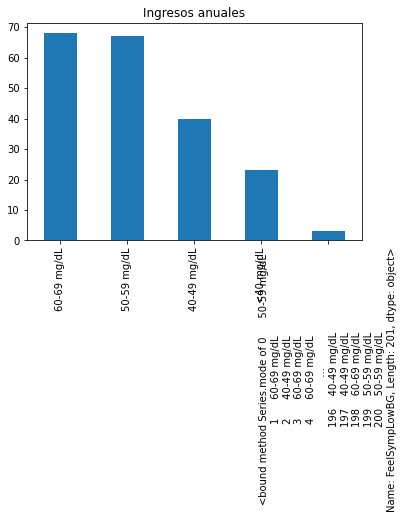

In [21]:
plt.subplots()
data['FeelSympLowBG'].value_counts().plot.bar(title="Ingresos anuales")

In [22]:
data1.replace({"FeelSympLowBG" : "<bound method Series.mode of 0      50-59 mg/dL     1      60-69 mg/dL  2      40-49 mg/dL   3      60-69 mg/dL   4      60-69 mg/dL          ...   196    40-49 mg/dL     197    40-49 mg/dL    198    60-69 mg/dL     199    50-59 mg/dL   200    50-59 mg/dL   Name: FeelSympLowBG, Length: 201, dtype: object>"}, "Other", inplace=True)


## Gráfico de barras en función de la salida. 

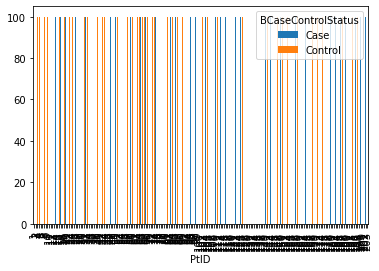

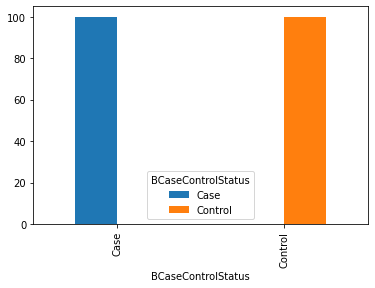

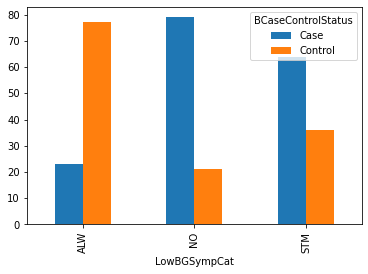

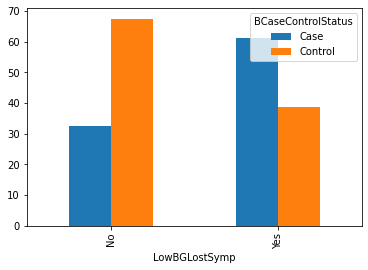

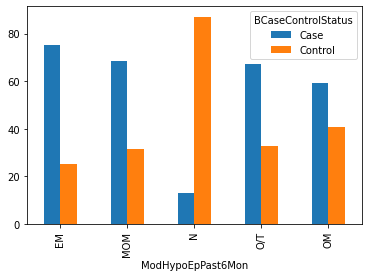

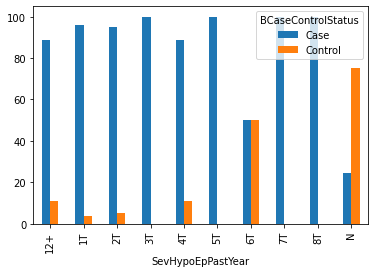

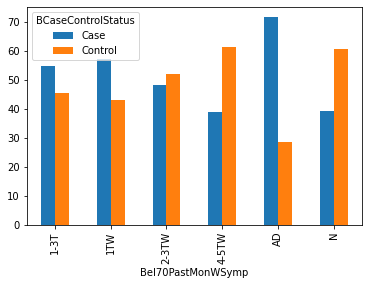

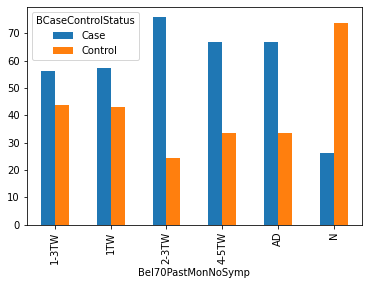

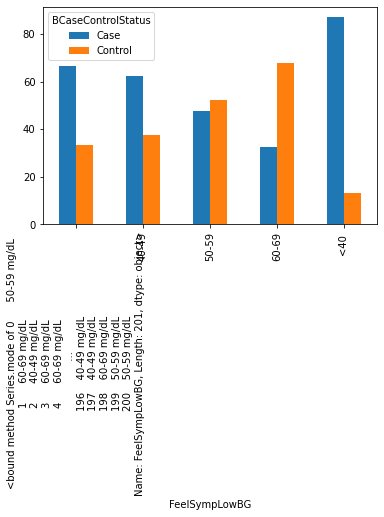

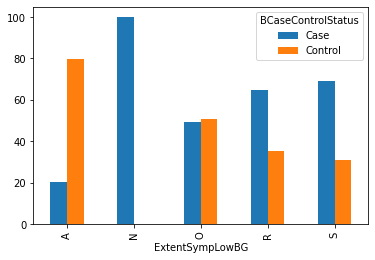

In [23]:
for element in data1.columns:
    
    plot = pd.crosstab(index=data1[element],
            columns=data1['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

In [24]:
list_cat_features=['LowBGSympCat','LowBGLostSymp','ModHypoEpPast6Mon', "SevHypoEpPastYear", "Bel70PastMonWSymp", "Bel70PastMonNoSymp", "FeelSympLowBG", "ExtentSympLowBG"]

In [25]:
from collections import Counter
def get_unique_categories_and_probs(x, n_samples, flag_normalize):
    counter_samples = Counter(x)
    dict_counter_samples = dict(counter_samples)

    x_unique = np.array(list(dict_counter_samples.keys()))
    counts_categories = np.array(list(dict_counter_samples.values()))

    y_pos = np.arange(len(x_unique))

    if flag_normalize:
        probs = np.array(counts_categories) / n_samples
    else:
        probs = np.array(counts_categories)

    return x_unique, probs, y_pos

In [26]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))
n_samples=data1.shape[0]
flag_normalize=True
width=0.35
for column_name in list_cat_features:
    high=data1[data1.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
    high2=data1[data1.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  # plt.hist([high, high2], bins=80, label=['Caso', 'Control'])
  # plt.legend(loc='upper left')
  # plt.show()
    x_unique1, probs1, y_pos1 = get_unique_categories_and_probs(high, n_samples, flag_normalize)
    x_unique2, probs2, y_pos2 = get_unique_categories_and_probs(high2, n_samples, flag_normalize)
    plt.bar(y_pos1 - width/2, probs1, width, label='class1', color='#0070FF')
    plt.bar(y_pos2 + width/2, probs2, width, label='class2', color='#FF8E07')
    plt.xticks(y_pos1, x_unique1, rotation=90, fontsize = 16)
    plt.yticks(fontsize = 16)
  # plt.set_xticklabels([fmt_cat(i) for i in x_unique1], rotation='vertical')
    plt.tight_layout()
    plt.savefig("{}.pdf".format(column_name))
    plt.close()

<ipython-input-26-8dd2df6187c1>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


## Transformar los datos

In [27]:
data_output = data1["BCaseControlStatus"].replace(["Case", "Control"],[1, 0])
data_output.head()

0    1
1    0
2    1
3    0
4    1
Name: BCaseControlStatus, dtype: int64

In [28]:
data1.head()

,PtID,BCaseControlStatus,LowBGSympCat,LowBGLostSymp,ModHypoEpPast6Mon,SevHypoEpPastYear,Bel70PastMonWSymp,Bel70PastMonNoSymp,FeelSympLowBG,ExtentSympLowBG
0,199,Case,STM,Yes,MOM,4T,1TW,1TW,50-59,S
1,56,Control,NO,Yes,N,N,N,N,60-69,R
2,201,Case,STM,Yes,O/T,N,N,2-3TW,40-49,S
3,107,Control,STM,Yes,N,N,AD,AD,60-69,O
4,47,Case,STM,No,MOM,12+,1-3T,2-3TW,60-69,S


In [29]:
data_input_new = data1

In [30]:
data_input_new.head()

,PtID,BCaseControlStatus,LowBGSympCat,LowBGLostSymp,ModHypoEpPast6Mon,SevHypoEpPastYear,Bel70PastMonWSymp,Bel70PastMonNoSymp,FeelSympLowBG,ExtentSympLowBG
0,199,Case,STM,Yes,MOM,4T,1TW,1TW,50-59,S
1,56,Control,NO,Yes,N,N,N,N,60-69,R
2,201,Case,STM,Yes,O/T,N,N,2-3TW,40-49,S
3,107,Control,STM,Yes,N,N,AD,AD,60-69,O
4,47,Case,STM,No,MOM,12+,1-3T,2-3TW,60-69,S


In [31]:
data_input_new["LowBGLostSymp"] = data1["LowBGLostSymp"].replace(["Yes", "No"],[1, 0])

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

enc_data = pd.DataFrame(enc.fit_transform(data_input_new[['ExtentSympLowBG']]).toarray())
data_input_new['ExtentSympLowBG'].value_counts() # Identifity categories
Cateogy_onehot = pd.get_dummies(data_input_new.ExtentSympLowBG, prefix='ExtentSympLowBG')
data_input_new = pd.concat([data_input_new,pd.get_dummies(data_input_new['ExtentSympLowBG'], prefix='ExtentSympLowBG')],axis=1)

In [33]:
enc_data = pd.DataFrame(enc.fit_transform(data_input_new[['LowBGSympCat']]).toarray())
data_input_new['LowBGSympCat'].value_counts() # Identifity categories
Cateogy_onehot = pd.get_dummies(data_input_new.ExtentSympLowBG, prefix='LowBGSympCat')
data_input_new = pd.concat([data_input_new,pd.get_dummies(data_input_new['LowBGSympCat'], prefix='LowBGSympCat')],axis=1)

In [34]:
enc_data = pd.DataFrame(enc.fit_transform(data_input_new[['Bel70PastMonWSymp']]).toarray())
data_input_new['Bel70PastMonWSymp'].value_counts() # Identifity categories
Cateogy_onehot = pd.get_dummies(data_input_new.ExtentSympLowBG, prefix='Bel70PastMonWSymp')
data_input_new = pd.concat([data_input_new,pd.get_dummies(data_input_new['Bel70PastMonWSymp'], prefix='Bel70PastMonWSymp')],axis=1)

In [35]:
enc_data = pd.DataFrame(enc.fit_transform(data_input_new[['ModHypoEpPast6Mon']]).toarray())
data_input_new['ModHypoEpPast6Mon'].value_counts() # Identifity categories
Cateogy_onehot = pd.get_dummies(data_input_new.ExtentSympLowBG, prefix='ModHypoEpPast6Mon')
data_input_new = pd.concat([data_input_new,pd.get_dummies(data_input_new['ModHypoEpPast6Mon'], prefix='ModHypoEpPast6Mon')],axis=1)

In [36]:
enc_data = pd.DataFrame(enc.fit_transform(data_input_new[['Bel70PastMonNoSymp']]).toarray())
data_input_new['Bel70PastMonNoSymp'].value_counts() # Identifity categories
Cateogy_onehot = pd.get_dummies(data_input_new.ExtentSympLowBG, prefix='Bel70PastMonNoSymp')
data_input_new = pd.concat([data_input_new,pd.get_dummies(data_input_new['Bel70PastMonNoSymp'], prefix='Bel70PastMonNoSymp')],axis=1)

In [37]:
enc_data = pd.DataFrame(enc.fit_transform(data_input_new[['SevHypoEpPastYear']]).toarray())
data_input_new['SevHypoEpPastYear'].value_counts() # Identifity categories
Cateogy_onehot = pd.get_dummies(data_input_new.SevHypoEpPastYear, prefix='SevHypoEpPastYear')
data_input_new = pd.concat([data_input_new,pd.get_dummies(data_input_new['SevHypoEpPastYear'], prefix='SevHypoEpPastYear')],axis=1)

In [38]:
data_input_new = data_input_new.drop(["Bel70PastMonNoSymp", "FeelSympLowBG", "FeelSympLowBG", "ModHypoEpPast6Mon", "Bel70PastMonWSymp", "LowBGSympCat", "ExtentSympLowBG"], axis = 1)
data_input_new.head()



,PtID,BCaseControlStatus,LowBGLostSymp,SevHypoEpPastYear,ExtentSympLowBG_A,ExtentSympLowBG_N,ExtentSympLowBG_O,ExtentSympLowBG_R,ExtentSympLowBG_S,LowBGSympCat_ALW,...,SevHypoEpPastYear_12+,SevHypoEpPastYear_1T,SevHypoEpPastYear_2T,SevHypoEpPastYear_3T,SevHypoEpPastYear_4T,SevHypoEpPastYear_5T,SevHypoEpPastYear_6T,SevHypoEpPastYear_7T,SevHypoEpPastYear_8T,SevHypoEpPastYear_N
0,199,Case,1,4T,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,56,Control,1,N,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,201,Case,1,N,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,107,Control,1,N,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,47,Case,0,12+,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
data_input_new

,PtID,BCaseControlStatus,LowBGLostSymp,SevHypoEpPastYear,ExtentSympLowBG_A,ExtentSympLowBG_N,ExtentSympLowBG_O,ExtentSympLowBG_R,ExtentSympLowBG_S,LowBGSympCat_ALW,...,SevHypoEpPastYear_12+,SevHypoEpPastYear_1T,SevHypoEpPastYear_2T,SevHypoEpPastYear_3T,SevHypoEpPastYear_4T,SevHypoEpPastYear_5T,SevHypoEpPastYear_6T,SevHypoEpPastYear_7T,SevHypoEpPastYear_8T,SevHypoEpPastYear_N
0,199,Case,1,4T,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,56,Control,1,N,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,201,Case,1,N,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,107,Control,1,N,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,47,Case,0,12+,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,70,Case,1,1T,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
197,147,Control,0,1T,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
198,160,Control,1,N,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
199,111,Control,1,N,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
data_input_new2 = data_input_new.drop(["SevHypoEpPastYear"], axis = 1)
#data_new = data_new.drop(["class"], axis = 1)
#data_input = data1.drop(["BCaseControlStatus", "PtID", "class"], axis = 1)

In [41]:
data_input_new = data_input_new2.drop(["BCaseControlStatus", "PtID"], axis = 1)

In [42]:
data_input_new.head()

,LowBGLostSymp,ExtentSympLowBG_A,ExtentSympLowBG_N,ExtentSympLowBG_O,ExtentSympLowBG_R,ExtentSympLowBG_S,LowBGSympCat_ALW,LowBGSympCat_NO,LowBGSympCat_STM,Bel70PastMonWSymp_1-3T,...,SevHypoEpPastYear_12+,SevHypoEpPastYear_1T,SevHypoEpPastYear_2T,SevHypoEpPastYear_3T,SevHypoEpPastYear_4T,SevHypoEpPastYear_5T,SevHypoEpPastYear_6T,SevHypoEpPastYear_7T,SevHypoEpPastYear_8T,SevHypoEpPastYear_N
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0


# Modelo de ML

In [43]:
model   =[]
mean = []
std = []

model2   =[]
mean2 = []
std2 = []

In [44]:
results=[]
sensibilidad_f=[]
accuracy_f = []
roc_f = []

# Knn

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
def knn (X_train,X_test,Y_train,Y_test,seed):
    param_grid = {'n_neighbors': range(1,50,2)}
    k_grid = np.array(range(1,50,2))
    grid_knn = GridSearchCV(KNeighborsClassifier(metric = 'hamming'), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)

    grid_knn.fit(X_train, Y_train) 
      #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
    auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])

    plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
    plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
    plt.xlabel('k',fontsize=14)
    plt.ylabel('roc_auc',fontsize=14)
    plt.legend()
    plt.show()
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
    print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))
      # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol

    grid_knn.get_params()
      # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test

    kNN_clasif_all = grid_knn.best_estimator_
    modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)
    y_output_knn2 = modelo_knn_clasif2.predict(X_test)
    print(accuracy_score(Y_test, y_output_knn2))
    print(confusion_matrix(Y_test, y_output_knn2))
    Sensibilidad= recall_score(Y_test, y_output_knn2)
    Accuracy = accuracy_score(Y_test, y_output_knn2)
 #   preds = model.predict(X_test)
    #Specificity = metrics.recall_score(Y_test, preds, pos_label=0)
    #Specificity= metrics.recall_specificity(Y_test, y_output_knn2)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
    roc_auc = metrics.auc(fpr, tpr)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')
    Especificidad = tn / (tn + fp)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(160, 36) (160,) (41, 36) (41,)


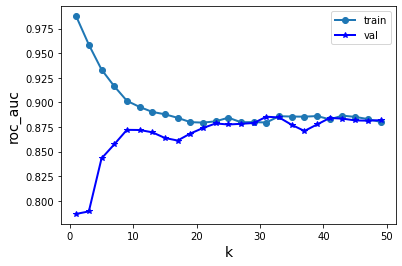

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.885
Valor correspondiente para el hiperparámetro: {'n_neighbors': 31}
0.8292682926829268
[[18  2]
 [ 5 16]]
Sensibilidad y Accuracy 0.7619047619047619 0.8292682926829268
tn: 18, fp:2, fn:5, tp:16


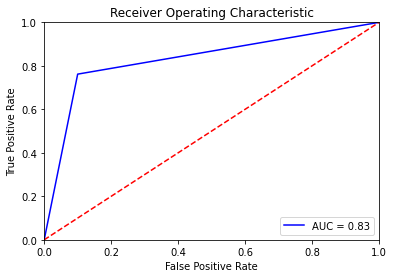

(160, 36) (160,) (41, 36) (41,)


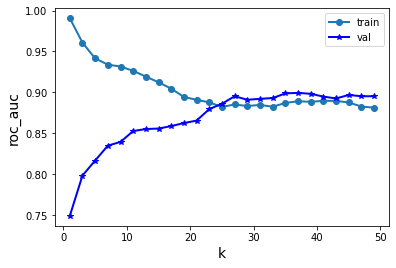

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.899
Valor correspondiente para el hiperparámetro: {'n_neighbors': 37}
0.8048780487804879
[[16  4]
 [ 4 17]]
Sensibilidad y Accuracy 0.8095238095238095 0.8048780487804879
tn: 16, fp:4, fn:4, tp:17


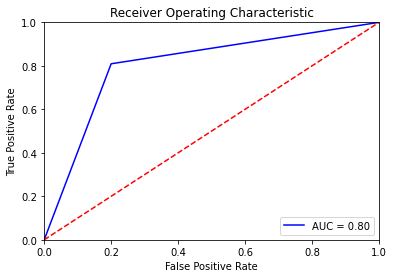

(160, 36) (160,) (41, 36) (41,)


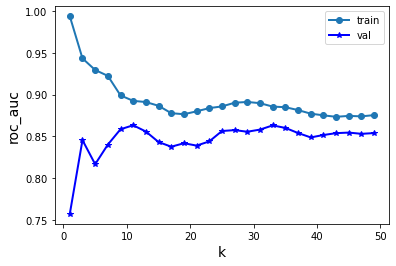

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.863
Valor correspondiente para el hiperparámetro: {'n_neighbors': 11}
0.7804878048780488
[[15  5]
 [ 4 17]]
Sensibilidad y Accuracy 0.8095238095238095 0.7804878048780488
tn: 15, fp:5, fn:4, tp:17


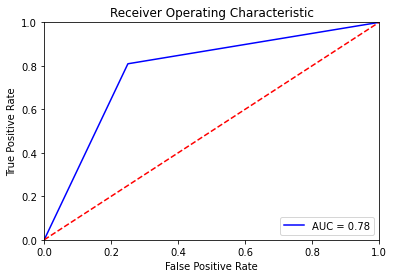

(160, 36) (160,) (41, 36) (41,)


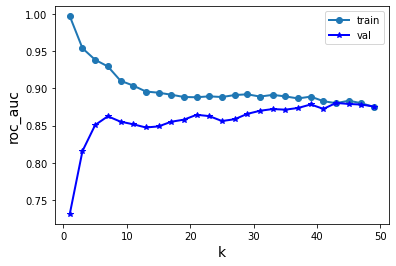

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.880
Valor correspondiente para el hiperparámetro: {'n_neighbors': 43}
0.8536585365853658
[[16  4]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.8536585365853658
tn: 16, fp:4, fn:2, tp:19


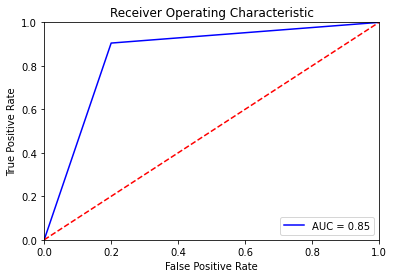

(160, 36) (160,) (41, 36) (41,)


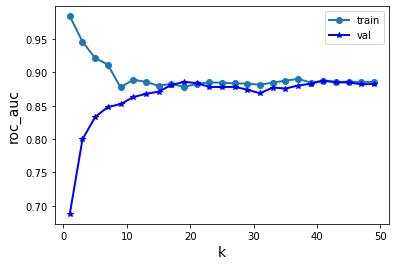

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.888
Valor correspondiente para el hiperparámetro: {'n_neighbors': 41}
0.8292682926829268
[[16  4]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.8292682926829268
tn: 16, fp:4, fn:3, tp:18


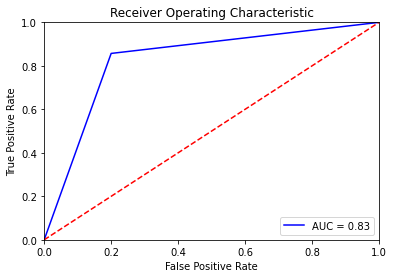

In [46]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_new, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)


    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])
   # especi.append(b[3])
    

In [47]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...

print(media_knn, desviacion_estandar_knn)
model.append("KNN")
mean.append(media_knn)
std.append(desviacion_estandar_knn)
media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2.append("KNN")
mean2.append(media_knn2)
std2.append(desviacion_estandar_knn2)


media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2.append("KNN")
mean2.append(media_knn2)
std2.append(desviacion_estandar_knn2)
print(media_knn2, desviacion_estandar_knn2)


media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)


media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.8195121951219512 0.027809156709735043
0.8192857142857143 0.027797045471802388
0.8285714285714285 0.05429406786186372
0.81 0.05477225575051661


# SVC

In [48]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
def svc (X_train,X_test,Y_train,Y_test, seed):

  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
    svc=SVC(decision_function_shape='ovo' , random_state=seed)
    parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],

                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

    svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)
    svc.fit(X_train, Y_train) #Entrenamos
  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
    roc_svc_val = np.array(svc.cv_results_['mean_test_score'])
  # Mostramos el mejor valor del parámetro y el score
    print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))
  # 2. Consulta de los valores de los hiper-parámetros 
    svc.get_params()
  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    svc_classif = svc.best_estimator_
    modelo_svc = svc_classif.fit(X_train, Y_train)
    y_output_svc = modelo_svc.predict(X_test)

    print(accuracy_score(Y_test, y_output_svc))

    print(confusion_matrix(Y_test, y_output_svc))

    Sensibilidad= recall_score(Y_test, y_output_svc)

    Accuracy = accuracy_score(Y_test, y_output_svc)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')
    Especificidad = tn / (tn + fp)


    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
    roc_auc = metrics.auc(fpr, tpr)
    roc_val = roc_auc_score(Y_test, y_output_svc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(160, 36) (160,) (41, 36) (41,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.904
0.8048780487804879
[[18  2]
 [ 6 15]]
Sensibilidad y Accuracy 0.7142857142857143 0.8048780487804879
tn: 18, fp:2, fn:6, tp:15


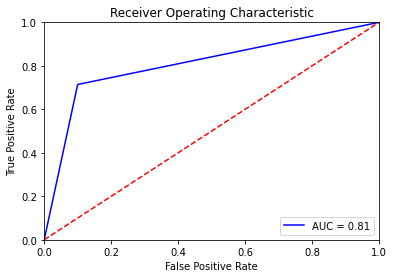

(160, 36) (160,) (41, 36) (41,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.919
0.8780487804878049
[[15  5]
 [ 0 21]]
Sensibilidad y Accuracy 1.0 0.8780487804878049
tn: 15, fp:5, fn:0, tp:21


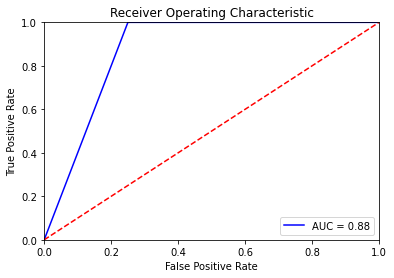

(160, 36) (160,) (41, 36) (41,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.906
0.8292682926829268
[[15  5]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.8292682926829268
tn: 15, fp:5, fn:2, tp:19


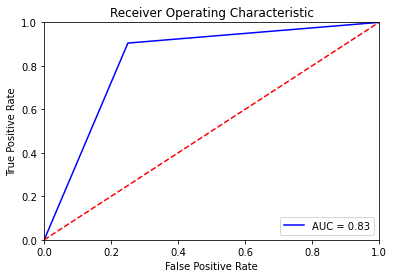

(160, 36) (160,) (41, 36) (41,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.912
0.7804878048780488
[[18  2]
 [ 7 14]]
Sensibilidad y Accuracy 0.6666666666666666 0.7804878048780488
tn: 18, fp:2, fn:7, tp:14


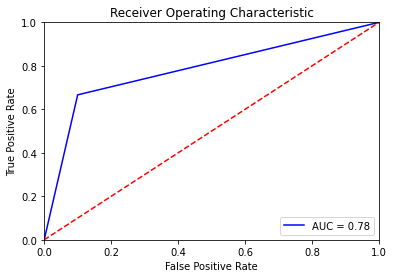

(160, 36) (160,) (41, 36) (41,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.918
0.8780487804878049
[[19  1]
 [ 4 17]]
Sensibilidad y Accuracy 0.8095238095238095 0.8780487804878049
tn: 19, fp:1, fn:4, tp:17


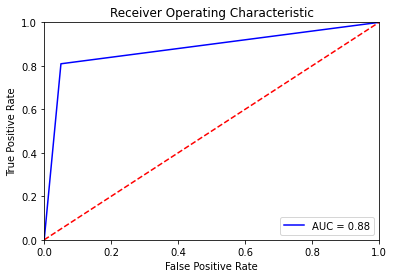

[0.7142857142857143, 1.0, 0.9047619047619048, 0.6666666666666666, 0.8095238095238095] [0.8048780487804879, 0.8780487804878049, 0.8292682926829268, 0.7804878048780488, 0.8780487804878049] [0.8071428571428572, 0.875, 0.8273809523809523, 0.7833333333333333, 0.8797619047619047] []


In [49]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
roc_new = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_new, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = svc(X_train, X_test, Y_train, Y_test, i)
    
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
   # roc_new.append(b[3])
    espe.append(b[3])



print(sensi, accuracy, roc, roc_new)

In [50]:
import statistics
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model.append("SVM")
mean.append(media_svc)
std.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2.append("SVM")
mean2.append(media_svc2)
std2.append(desviacion_estandar_svc2)

media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)
media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.8341463414634146 0.04363059468292271
0.8345238095238096 0.042148573731191616
0.819047619047619 0.13636020060263193
0.85 0.09354143466934853


## DecisionTree

In [51]:
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_std_all_train, X_std_all_test, Y_train, Y_test,seed):
    
    #std_all = preprocessing.StandardScaler().fit(X_train) #Extraemos las características y hacemos la estadndarización
    #X_std_all_train = std_all.transform(X_train) #tiene las 8 características estandarizadas
    #X_std_all_test = std_all.transform(X_test)
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,9)}
    profundidad_grid = np.array(range(1,9))

    print(X_std_all_train)
  #  X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)

    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_std_all_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    
    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    print(grid_arbol_clasif.get_params())


    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_std_all_train, Y_train)

    y_output_arbol = modelo_arbol_clasif.predict(X_std_all_test)
    print(accuracy_score(Y_test, y_output_arbol))
    print(confusion_matrix(Y_test, y_output_arbol))

    Sensibilidad= recall_score(Y_test, y_output_arbol)
    Accuracy = accuracy_score(Y_test, y_output_arbol)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')
    Especificidad = tn / (tn + fp)

    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)





(160, 36) (160,) (41, 36) (41,)
     LowBGLostSymp  ExtentSympLowBG_A  ExtentSympLowBG_N  ExtentSympLowBG_O  \
26               0                  0                  0                  1   
1                1                  0                  0                  0   
162              1                  0                  0                  1   
25               1                  1                  0                  0   
94               1                  0                  0                  1   
..             ...                ...                ...                ...   
53               0                  1                  0                  0   
115              1                  0                  0                  0   
178              0                  1                  0                  0   
99               0                  0                  0                  1   
119              0                  0                  0                  0   

     ExtentSympLowB

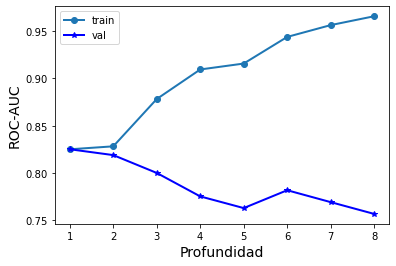

Mejor ROC-AUC en validación cruzada: 0.825
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.8048780487804879
[[18  2]
 [ 6 15]]
tn: 18, fp:2, fn:6, tp:15
Sensibilidad y Accuracy 0.7142857142857143 0.8048780487804879


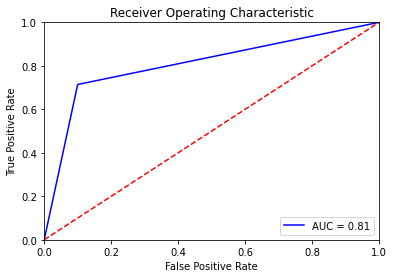

(160, 36) (160,) (41, 36) (41,)
     LowBGLostSymp  ExtentSympLowBG_A  ExtentSympLowBG_N  ExtentSympLowBG_O  \
150              1                  0                  0                  0   
197              0                  0                  0                  0   
58               0                  0                  0                  1   
161              1                  0                  0                  0   
86               1                  0                  0                  1   
..             ...                ...                ...                ...   
107              1                  0                  0                  1   
49               1                  0                  0                  1   
114              1                  0                  0                  1   
128              0                  1                  0                  0   
50               0                  1                  0                  0   

     ExtentSympLowB

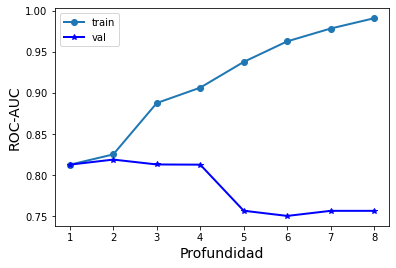

Mejor ROC-AUC en validación cruzada: 0.819
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.8536585365853658
[[20  0]
 [ 6 15]]
tn: 20, fp:0, fn:6, tp:15
Sensibilidad y Accuracy 0.7142857142857143 0.8536585365853658


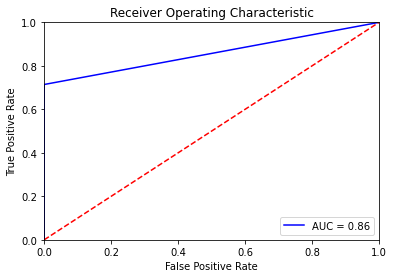

(160, 36) (160,) (41, 36) (41,)
     LowBGLostSymp  ExtentSympLowBG_A  ExtentSympLowBG_N  ExtentSympLowBG_O  \
131              1                  0                  0                  1   
30               0                  0                  0                  0   
168              1                  0                  0                  0   
154              1                  0                  1                  0   
28               1                  0                  0                  0   
..             ...                ...                ...                ...   
46               0                  0                  0                  1   
5                0                  1                  0                  0   
58               0                  0                  0                  1   
151              1                  0                  0                  0   
183              1                  1                  0                  0   

     ExtentSympLowB

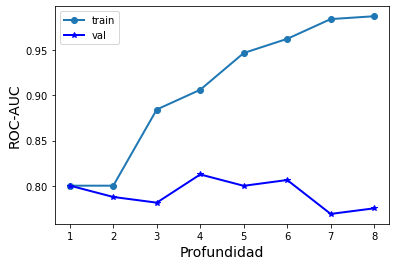

Mejor ROC-AUC en validación cruzada: 0.812
Mejor valor del hiperparámetro: {'max_depth': 4}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.9512195121951219
[[18  2]
 [ 0 21]]
tn: 18, fp:2, fn:0, tp:21
Sensibilidad y Accuracy 1.0 0.9512195121951219


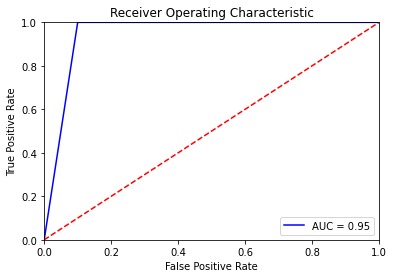

(160, 36) (160,) (41, 36) (41,)
     LowBGLostSymp  ExtentSympLowBG_A  ExtentSympLowBG_N  ExtentSympLowBG_O  \
77               1                  0                  0                  0   
147              0                  0                  0                  0   
51               1                  1                  0                  0   
157              0                  0                  0                  1   
65               0                  1                  0                  0   
..             ...                ...                ...                ...   
74               1                  0                  0                  1   
120              1                  0                  0                  0   
191              0                  0                  0                  1   
164              1                  0                  0                  0   
57               1                  0                  0                  0   

     ExtentSympLowB

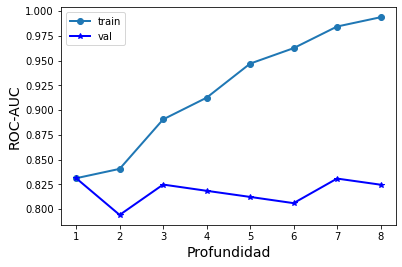

Mejor ROC-AUC en validación cruzada: 0.831
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.7804878048780488
[[18  2]
 [ 7 14]]
tn: 18, fp:2, fn:7, tp:14
Sensibilidad y Accuracy 0.6666666666666666 0.7804878048780488


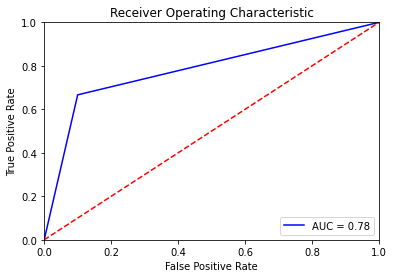

(160, 36) (160,) (41, 36) (41,)
     LowBGLostSymp  ExtentSympLowBG_A  ExtentSympLowBG_N  ExtentSympLowBG_O  \
54               1                  0                  0                  1   
28               1                  0                  0                  0   
25               1                  1                  0                  0   
21               0                  1                  0                  0   
24               1                  1                  0                  0   
..             ...                ...                ...                ...   
130              1                  0                  0                  0   
146              1                  0                  0                  1   
29               1                  0                  0                  0   
43               0                  1                  0                  0   
92               0                  1                  0                  0   

     ExtentSympLowB

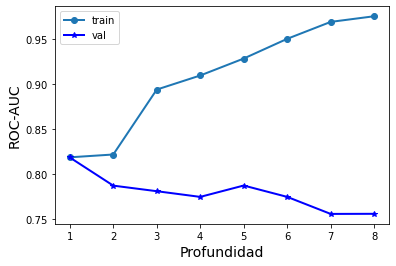

Mejor ROC-AUC en validación cruzada: 0.819
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.8292682926829268
[[19  1]
 [ 6 15]]
tn: 19, fp:1, fn:6, tp:15
Sensibilidad y Accuracy 0.7142857142857143 0.8292682926829268


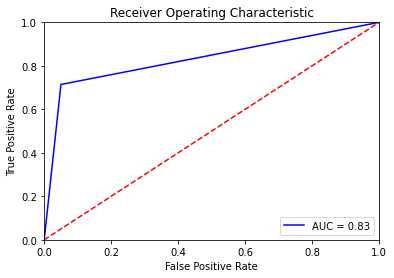

[0.7142857142857143, 0.7142857142857143, 1.0, 0.6666666666666666, 0.7142857142857143] [0.8048780487804879, 0.8536585365853658, 0.9512195121951219, 0.7804878048780488, 0.8292682926829268] [0.8071428571428572, 0.8571428571428572, 0.9500000000000001, 0.7833333333333333, 0.8321428571428572]


In [52]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_new, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = decisionTree(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [53]:
import statistics
media_sen_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit = statistics.stdev(accuracy) # 5.164...

print(media_sen_logarit, desviacion_estandar_sen_logarit)
model.append("DT")
mean.append(media_sen_logarit)
std.append(desviacion_estandar_sen_logarit)


media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...
print(media_log, desviacion_estandar_log)

model2.append("DT")
mean2.append(media_log)
std2.append(desviacion_estandar_log)


media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)

media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.8439024390243902 0.06589881017612824
0.845952380952381 0.06436062654630632
0.7619047619047619 0.13468700594029476
0.93 0.04472135954999577


# Regresión Logística

import statistics
media_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_logarit = statistics.stdev(accuracy) # 5.164...


model.append("Regr_Log")
mean.append(media_logarit)
std.append(desviacion_estandar_logarit)

# Regresión Logística Lasso

In [54]:
def reg_Lasso(X_train_norm, X_test_norm, Y_train, Y_test):
              

    #scaler = StandardScaler() #normalizamos
    #scalerfit =  scaler.fit(X_train) #fit con los datos de train
    #X_train_norm=scaler.transform(X_train) #balancear el train, normalizar en los métodos que hay relación entre variables y normalizamos tanto el conjunto de entrenamiento como el de test.
    #X_test_norm=scaler.transform(X_test)
    # NORMALIZANDO 
              
    from sklearn.linear_model import Lasso

    lasso = Lasso()

    logreg=LogisticRegression(solver='liblinear', penalty='l1')
    # Valores de alpha
    parameters = {"C":[1e-4, 1e-2, 1, 5, 10, 20]}

    # Grid search para lasso regression
    lasso_regression = GridSearchCV(logreg, parameters, scoring='accuracy', cv=5)

    # Entrenamos
    lasso_train=lasso_regression.fit(X_train_norm, Y_train)

    print(lasso_regression.best_params_)
    print(lasso_regression.best_score_)

    # Obtenemos la salida predicha
    y_pred_lasso = lasso_regression.predict(X_test_norm)
#  Calculamos la matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_lasso)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lasso).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')
    Especificidad = tn / (tn + fp)

    # Calcumos accuracy_score
    Accuracy=accuracy_score(Y_test, y_pred_lasso)
    print(f'Accuracy: {Accuracy}')

    target_names = ['Non-diabetic', 'Diabetic']
    print(classification_report(Y_test, y_pred_lasso, target_names=target_names))

    #Sensibilidad
    Sensibilidad=recall_score(Y_test, y_pred_lasso)
    print(f'Sensibilidad: {Sensibilidad}')
    #accuracy.append(Accuracy)
    #sensibilidad.append(Sensibilidad)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lasso)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #roc.append(roc_auc)

    return (Sensibilidad, Accuracy, roc_auc, Especificidad)

(160, 36) (160,) (41, 36) (41,)
{'C': 1}
0.8
[[18  2]
 [ 4 17]]
tn: 18, fp:2, fn:4, tp:17
Accuracy: 0.8536585365853658
              precision    recall  f1-score   support

Non-diabetic       0.82      0.90      0.86        20
    Diabetic       0.89      0.81      0.85        21

    accuracy                           0.85        41
   macro avg       0.86      0.85      0.85        41
weighted avg       0.86      0.85      0.85        41

Sensibilidad: 0.8095238095238095


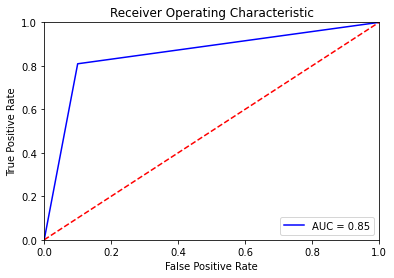

(160, 36) (160,) (41, 36) (41,)
{'C': 1}
0.7875
[[17  3]
 [ 4 17]]
tn: 17, fp:3, fn:4, tp:17
Accuracy: 0.8292682926829268
              precision    recall  f1-score   support

Non-diabetic       0.81      0.85      0.83        20
    Diabetic       0.85      0.81      0.83        21

    accuracy                           0.83        41
   macro avg       0.83      0.83      0.83        41
weighted avg       0.83      0.83      0.83        41

Sensibilidad: 0.8095238095238095


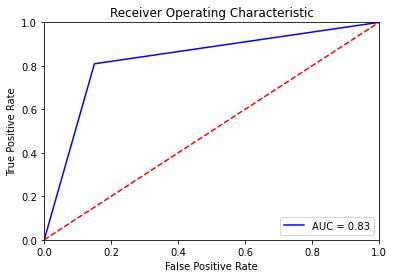

(160, 36) (160,) (41, 36) (41,)
{'C': 5}
0.78125
[[18  2]
 [ 3 18]]
tn: 18, fp:2, fn:3, tp:18
Accuracy: 0.8780487804878049
              precision    recall  f1-score   support

Non-diabetic       0.86      0.90      0.88        20
    Diabetic       0.90      0.86      0.88        21

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41

Sensibilidad: 0.8571428571428571


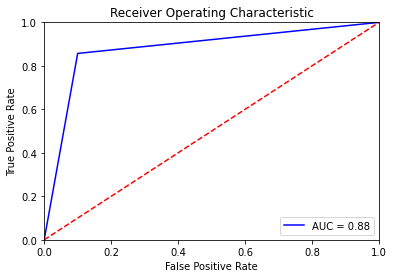

(160, 36) (160,) (41, 36) (41,)
{'C': 1}
0.81875
[[17  3]
 [ 4 17]]
tn: 17, fp:3, fn:4, tp:17
Accuracy: 0.8292682926829268
              precision    recall  f1-score   support

Non-diabetic       0.81      0.85      0.83        20
    Diabetic       0.85      0.81      0.83        21

    accuracy                           0.83        41
   macro avg       0.83      0.83      0.83        41
weighted avg       0.83      0.83      0.83        41

Sensibilidad: 0.8095238095238095


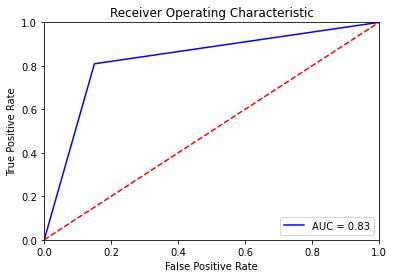

(160, 36) (160,) (41, 36) (41,)
{'C': 1}
0.79375
[[18  2]
 [ 2 19]]
tn: 18, fp:2, fn:2, tp:19
Accuracy: 0.9024390243902439
              precision    recall  f1-score   support

Non-diabetic       0.90      0.90      0.90        20
    Diabetic       0.90      0.90      0.90        21

    accuracy                           0.90        41
   macro avg       0.90      0.90      0.90        41
weighted avg       0.90      0.90      0.90        41

Sensibilidad: 0.9047619047619048


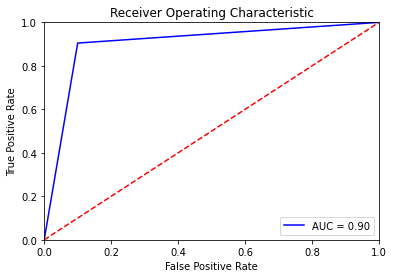

[0.8095238095238095, 0.8095238095238095, 0.8571428571428571, 0.8095238095238095, 0.9047619047619048] [0.8536585365853658, 0.8292682926829268, 0.8780487804878049, 0.8292682926829268, 0.9024390243902439] [0.8547619047619047, 0.8297619047619047, 0.8785714285714286, 0.8297619047619047, 0.9023809523809523]


In [55]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_new, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = reg_Lasso(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [56]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model.append("LASSO")
mean.append(media_lasso)
std.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2.append("LASSO")
mean2.append(media_lasso2)
std2.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)


media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.8585365853658536 0.03180098734245197
0.859047619047619 0.031593632212391816
0.8380952380952381 0.04259177099999599
0.88 0.02738612787525833


In [57]:
def plot_mean_std_metric(df_metrics, lims, metric_name='', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [58]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model
df_metrics["mean"] = mean
df_metrics["std"] = std

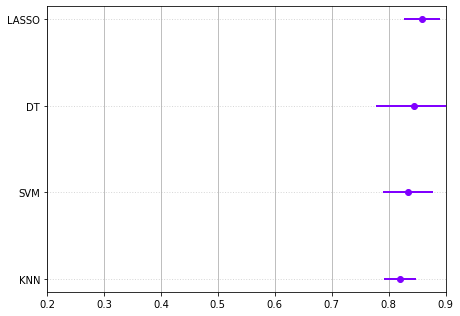

In [59]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='', flag_save_figure=True)



In [60]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2
df_metrics2["mean"] = mean2
df_metrics2["std"] = std2

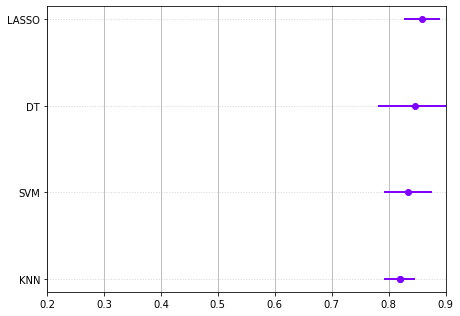

In [61]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)

# Feature Selection ExtraTreesClassifier

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

def extraTree(X_train, X_test, Y_train, Y_test):
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    # Como en árboles, no es necesario que las características estén normalizadas
    # Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

    forest.fit(X_train, Y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Muestra el ranking en el ordenamiento
    print("Ranking de Características:")

    for f in range(X_train.shape[1]):
        print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.title("Importancia de las características")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    return indices[0:5]

(160, 36) (160,) (41, 36) (41,)
Ranking de Características:
1. Característica 35 (0.263432)
2. Característica 17 (0.107510)
3. Característica 6 (0.049159)
4. Característica 27 (0.047115)
5. Característica 9 (0.037003)
6. Característica 25 (0.036823)
7. Característica 0 (0.036323)
8. Característica 20 (0.031234)
9. Característica 5 (0.028721)
10. Característica 28 (0.028004)
11. Característica 22 (0.026315)
12. Característica 1 (0.024950)
13. Característica 8 (0.023312)
14. Característica 18 (0.022000)
15. Característica 16 (0.021836)
16. Característica 14 (0.021091)
17. Característica 10 (0.020226)
18. Característica 3 (0.019740)
19. Característica 13 (0.016181)
20. Característica 11 (0.016055)
21. Característica 19 (0.013108)
22. Característica 4 (0.012046)
23. Característica 21 (0.011336)
24. Característica 2 (0.010946)
25. Característica 26 (0.010380)
26. Característica 12 (0.010202)
27. Característica 30 (0.009402)
28. Característica 7 (0.009090)
29. Característica 24 (0.007604)
30

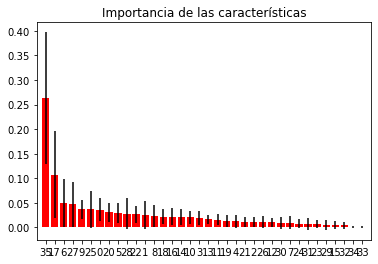

(160, 36) (160,) (41, 36) (41,)
Ranking de Características:
1. Característica 35 (0.230655)
2. Característica 17 (0.098228)
3. Característica 6 (0.048689)
4. Característica 0 (0.047454)
5. Característica 25 (0.046418)
6. Característica 27 (0.041798)
7. Característica 9 (0.040674)
8. Característica 22 (0.039647)
9. Característica 1 (0.036416)
10. Característica 16 (0.035399)
11. Característica 20 (0.031802)
12. Característica 18 (0.030556)
13. Característica 3 (0.025233)
14. Característica 8 (0.023389)
15. Característica 5 (0.022796)
16. Característica 28 (0.021630)
17. Característica 14 (0.021383)
18. Característica 19 (0.020301)
19. Característica 10 (0.019612)
20. Característica 11 (0.019054)
21. Característica 13 (0.010326)
22. Característica 21 (0.010303)
23. Característica 31 (0.009588)
24. Característica 7 (0.009084)
25. Característica 2 (0.008782)
26. Característica 12 (0.007269)
27. Característica 30 (0.007102)
28. Característica 26 (0.007020)
29. Característica 24 (0.005936)
3

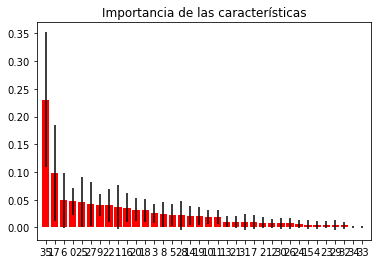

(160, 36) (160,) (41, 36) (41,)
Ranking de Características:
1. Característica 35 (0.227675)
2. Característica 17 (0.098954)
3. Característica 0 (0.053100)
4. Característica 9 (0.043188)
5. Característica 27 (0.043039)
6. Característica 6 (0.041787)
7. Característica 1 (0.038449)
8. Característica 20 (0.037056)
9. Característica 5 (0.036383)
10. Característica 18 (0.032532)
11. Característica 25 (0.029966)
12. Característica 14 (0.029116)
13. Característica 8 (0.027439)
14. Característica 16 (0.026206)
15. Característica 3 (0.025616)
16. Característica 10 (0.024605)
17. Característica 11 (0.023744)
18. Característica 28 (0.023594)
19. Característica 19 (0.017434)
20. Característica 22 (0.017344)
21. Característica 13 (0.012715)
22. Característica 21 (0.012456)
23. Característica 4 (0.012132)
24. Característica 2 (0.009961)
25. Característica 12 (0.008518)
26. Característica 26 (0.008359)
27. Característica 30 (0.007689)
28. Característica 15 (0.005764)
29. Característica 7 (0.005603)
30

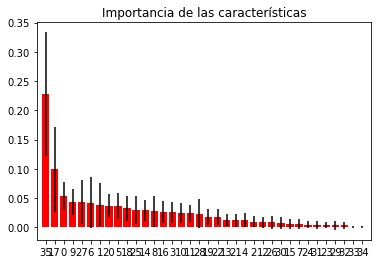

(160, 36) (160,) (41, 36) (41,)
Ranking de Características:
1. Característica 35 (0.264571)
2. Característica 17 (0.097269)
3. Característica 6 (0.052898)
4. Característica 27 (0.048515)
5. Característica 0 (0.041735)
6. Característica 9 (0.041085)
7. Característica 20 (0.034139)
8. Característica 25 (0.033491)
9. Característica 28 (0.032167)
10. Característica 1 (0.029210)
11. Característica 5 (0.028069)
12. Característica 18 (0.027531)
13. Característica 8 (0.027417)
14. Característica 14 (0.023817)
15. Característica 3 (0.023376)
16. Característica 16 (0.022816)
17. Característica 22 (0.020352)
18. Característica 11 (0.015906)
19. Característica 10 (0.015249)
20. Característica 13 (0.012681)
21. Característica 12 (0.010954)
22. Característica 30 (0.010776)
23. Característica 21 (0.009773)
24. Característica 4 (0.009257)
25. Característica 7 (0.008952)
26. Característica 19 (0.008701)
27. Característica 31 (0.008595)
28. Característica 26 (0.007965)
29. Característica 2 (0.007618)
30

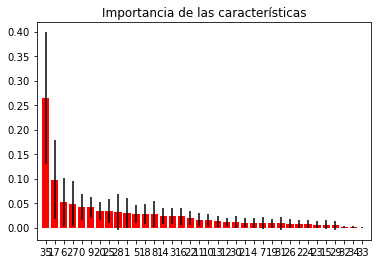

(160, 36) (160,) (41, 36) (41,)
Ranking de Características:
1. Característica 35 (0.241730)
2. Característica 17 (0.099445)
3. Característica 6 (0.055202)
4. Característica 27 (0.049788)
5. Característica 0 (0.044215)
6. Característica 25 (0.041435)
7. Característica 20 (0.035275)
8. Característica 1 (0.035274)
9. Característica 8 (0.033893)
10. Característica 9 (0.030577)
11. Característica 14 (0.030472)
12. Característica 5 (0.026964)
13. Característica 28 (0.026447)
14. Característica 18 (0.022633)
15. Característica 22 (0.022131)
16. Característica 3 (0.021621)
17. Característica 11 (0.021144)
18. Característica 10 (0.018913)
19. Característica 16 (0.017220)
20. Característica 13 (0.014820)
21. Característica 4 (0.013284)
22. Característica 19 (0.012582)
23. Característica 21 (0.011125)
24. Característica 12 (0.010013)
25. Característica 26 (0.008996)
26. Característica 2 (0.008856)
27. Característica 30 (0.008527)
28. Característica 24 (0.007421)
29. Característica 23 (0.007165)
3

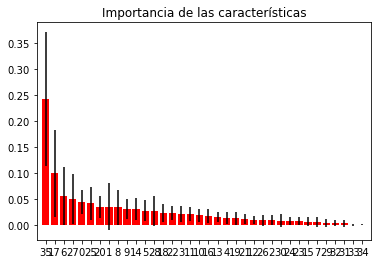

[array([35, 17,  6, 27,  9], dtype=int64), array([35, 17,  6,  0, 25], dtype=int64), array([35, 17,  0,  9, 27], dtype=int64), array([35, 17,  6, 27,  0], dtype=int64), array([35, 17,  6, 27,  0], dtype=int64)]


In [63]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_new, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = extraTree(X_train, X_test, Y_train, Y_test)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

#  Selección de características con el estadístico mutual Information

In [66]:
# Importamos las bibliotecas necesarias 
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# Scikit-learn proporciona la clase SelectKBest, que al usarse en combinación con distintos tests estadísticos, permite seleccionar una serie de características

def chisquare(X_train, X_test, Y_train, Y_test, data_input_new):
    # como tenemos 9 características, evaluamos el estadístico chi2 para las 9, y posteriormente ordenamos los valores
    bestfeatures = SelectKBest(score_func=mutual_info_classif, k=9)
    fit = bestfeatures.fit(data_input_new, data_output)
    print(fit.scores_)

    names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',"f12" 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36']
    data_input_new2 = pd.DataFrame(data_input_new, columns = names)

    for element,name in zip(data_input_new.columns, names):
        print(name,element)

    array = data_input_new.values
    data_input_array = array [:,0:36]
    print(data_input_array.shape)

    pd_extendido = pd.DataFrame(data_input_array, columns=names)

    df = pd.DataFrame({'Nombre_feat':pd_extendido.columns, 'valores':fit.scores_})
    df_ordenado = df.sort_values('valores', ascending=False)
    ax = df_ordenado.plot.bar(x='Nombre_feat', y='valores', rot=90)
    plt.title("Ordenamiento de características con el estadístico chi cuadrado y las características originales")


In [67]:
data_input_new.head()

,LowBGLostSymp,ExtentSympLowBG_A,ExtentSympLowBG_N,ExtentSympLowBG_O,ExtentSympLowBG_R,ExtentSympLowBG_S,LowBGSympCat_ALW,LowBGSympCat_NO,LowBGSympCat_STM,Bel70PastMonWSymp_1-3T,...,SevHypoEpPastYear_12+,SevHypoEpPastYear_1T,SevHypoEpPastYear_2T,SevHypoEpPastYear_3T,SevHypoEpPastYear_4T,SevHypoEpPastYear_5T,SevHypoEpPastYear_6T,SevHypoEpPastYear_7T,SevHypoEpPastYear_8T,SevHypoEpPastYear_N
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0


(160, 36) (160,) (41, 36) (41,)
[0.         0.07616483 0.03872016 0.0642326  0.         0.06160313
 0.09005933 0.0374308  0.02289427 0.04094145 0.         0.
 0.054698   0.0269936  0.         0.03089607 0.00994612 0.12954317
 0.02691175 0.04333344 0.         0.         0.00459899 0.
 0.         0.10073193 0.         0.14725777 0.06308152 0.0834754
 0.0109446  0.         0.         0.04817015 0.         0.24483822]
f0 LowBGLostSymp
f1 ExtentSympLowBG_A
f2 ExtentSympLowBG_N
f3 ExtentSympLowBG_O
f4 ExtentSympLowBG_R
f5 ExtentSympLowBG_S
f6 LowBGSympCat_ALW
f7 LowBGSympCat_NO
f8 LowBGSympCat_STM
f9 Bel70PastMonWSymp_1-3T
f10 Bel70PastMonWSymp_1TW
f11 Bel70PastMonWSymp_2-3TW
f12f13 Bel70PastMonWSymp_4-5TW
f14 Bel70PastMonWSymp_AD
f15 Bel70PastMonWSymp_N
f16 ModHypoEpPast6Mon_EM
f17 ModHypoEpPast6Mon_MOM
f18 ModHypoEpPast6Mon_N
f19 ModHypoEpPast6Mon_O/T
f20 ModHypoEpPast6Mon_OM
f21 Bel70PastMonNoSymp_1-3TW
f22 Bel70PastMonNoSymp_1TW
f23 Bel70PastMonNoSymp_2-3TW
f24 Bel70PastMonNoSymp_4-5TW
f

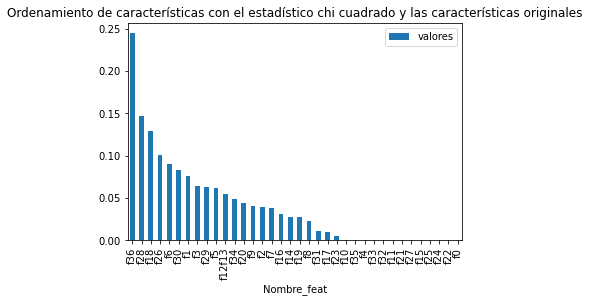

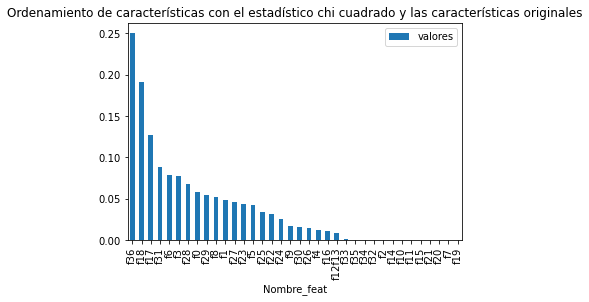

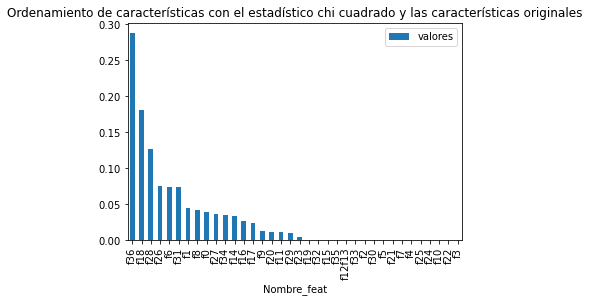

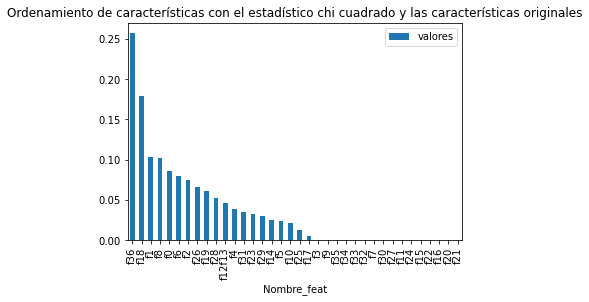

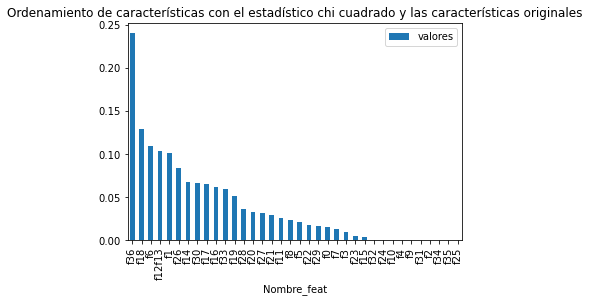

In [68]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_new, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = chisquare(X_train, X_test, Y_train, Y_test, data_input_new)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

In [69]:
from matplotlib import pyplot
def embedded(X_train, X_test, Y_train, Y_test, data_input_new):
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,6)}
    profundidad_grid = np.array(range(1,6))


    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    grid_arbol_clasif.get_params()

    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
    importance_arbol = modelo_arbol_clasif.feature_importances_
    pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
    pyplot.show()

    # 5. Se representa gráficamente el modelo de clasificación
    from sklearn.tree import export_graphviz
    #from sklearn.externals.six import StringIO  
    from six import StringIO
    from IPython.display import Image  
    import pydotplus

    dot_data = StringIO()
    export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = data_input_new.columns[0:],class_names=['y-diab','n-diab'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('Tree_Clasif_all.png')
    Image(graph.create_png())

(160, 36) (160,) (41, 36) (41,)
{'max_depth': 3}


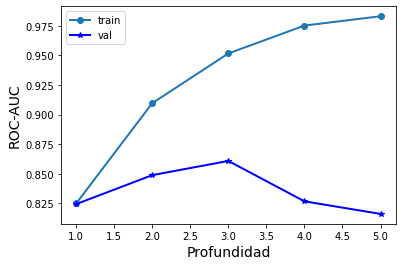

Mejor ROC-AUC en validación cruzada: 0.861
Mejor valor del hiperparámetro: {'max_depth': 3}


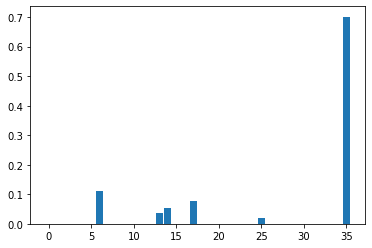

(160, 36) (160,) (41, 36) (41,)
{'max_depth': 3}


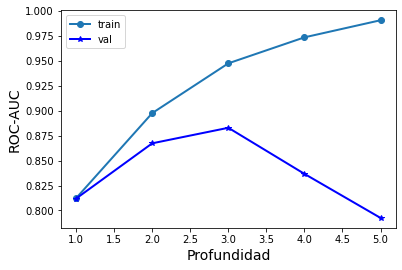

Mejor ROC-AUC en validación cruzada: 0.883
Mejor valor del hiperparámetro: {'max_depth': 3}


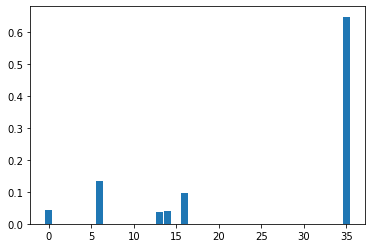

(160, 36) (160,) (41, 36) (41,)
{'max_depth': 2}


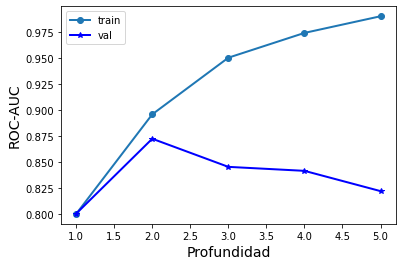

Mejor ROC-AUC en validación cruzada: 0.872
Mejor valor del hiperparámetro: {'max_depth': 2}


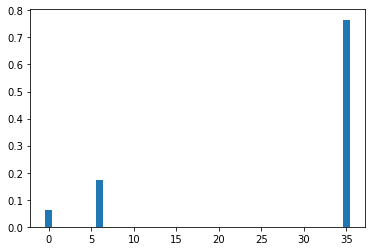

(160, 36) (160,) (41, 36) (41,)
{'max_depth': 2}


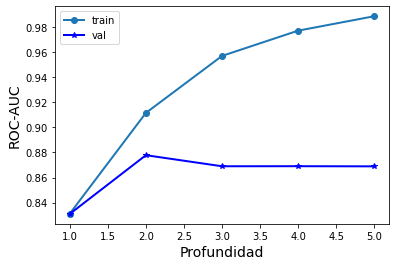

Mejor ROC-AUC en validación cruzada: 0.878
Mejor valor del hiperparámetro: {'max_depth': 2}


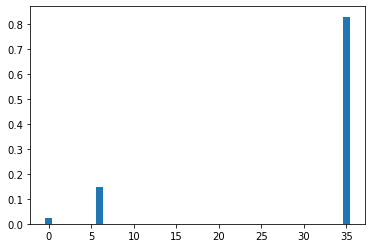

(160, 36) (160,) (41, 36) (41,)
{'max_depth': 3}


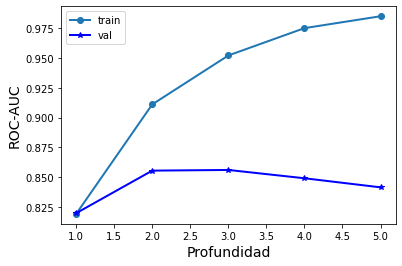

Mejor ROC-AUC en validación cruzada: 0.856
Mejor valor del hiperparámetro: {'max_depth': 3}


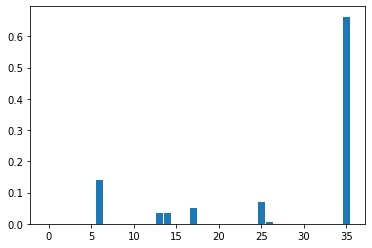

[None, None, None, None, None]


In [70]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_new, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = embedded(X_train, X_test, Y_train, Y_test, data_input_new)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

In [71]:
def compute_boostrap(df_data, v_column_names, label_name, generic_name, percentage_resampling=0.8, repetitions=30, flag_save_importance=False):

    list_variable_importance = []

    for i in range(len(v_column_names)):
        list_variable_importance.append(bootstrap_ci(df_data, v_column_names[i], (1 / percentage_resampling),
                                                     label_name, repetitions=repetitions))

    m_variable_importance = np.array(list_variable_importance)
    m_variable_importance = m_variable_importance.reshape(m_variable_importance.shape[0], 2)

    m_var_importance_bootstrap = np.c_[v_column_names, m_variable_importance]
    df_var_importance_bootstrap = pd.DataFrame(m_var_importance_bootstrap, columns=['var_name', 'ci_lower', 'ci_upper'])

    if flag_save_importance:
        df_var_importance_bootstrap.to_csv(str(Path.joinpath(consts.PATH_PROJECT_FS, 'df_var_importance_boostrap_{}.csv'.format(generic_name))), index=False)


def bootstrap_ci(df_data, variable, div, classes, repetitions=3000, alpha=0.05, random_state=np.arange(1, 30000, 10)):
    """
    Compute bootstrap method with confidence interval
    :param df_data: a dataframe that includes observations of the two sample (df models)
    :param variable: a column_name of the column that includes observations (sens, espec,acc,precision,auc)
    :param div:
    :param classes: a column_name of the column that includes classes (This column should contain two different group names: dt and lasso, dt and svm, svm and lasso)
    :param repetitions: the number of times you want the bootstrapping to repeat. Default is 1000.
    :param alpha: likelihood that the true population parameter lies outside the confidence interval. Default is 0.05.
    :param random_state: enable users to set their own random_state, default is None
    :return:
    """
    df = df_data[[variable, classes]]
    bootstrap_sample_size = len(df)

    proportion_diffs = []
    print("sample size: ", int(bootstrap_sample_size/div))

    for i in range(repetitions):

        bootstrap_sample = df.sample(n=int(bootstrap_sample_size/div), replace=False, random_state=random_state[i])

        print(bootstrap_sample)

        label_0 = (bootstrap_sample[(bootstrap_sample[classes] == 0)])
        mean_label_0 = label_0[variable].mean()
        label_1 = (bootstrap_sample[(bootstrap_sample[classes] == 1)])
        mean_label_1 = label_1[variable].mean()

        proportion_diff = mean_label_1 - mean_label_0
        proportion_diffs.append(proportion_diff)

        df_proportions = pd.DataFrame(proportion_diffs)

    out = []

    for tt in range(len(df_proportions.columns)):

        left = np.percentile(df_proportions[tt], alpha / 2 * 100)
        right = np.percentile(df_proportions[tt], 100 - alpha / 2 * 100)
        out.append([round(left, 2), round(right, 2)])

    return out

In [72]:
data_input_new2.head()

,PtID,BCaseControlStatus,LowBGLostSymp,ExtentSympLowBG_A,ExtentSympLowBG_N,ExtentSympLowBG_O,ExtentSympLowBG_R,ExtentSympLowBG_S,LowBGSympCat_ALW,LowBGSympCat_NO,...,SevHypoEpPastYear_12+,SevHypoEpPastYear_1T,SevHypoEpPastYear_2T,SevHypoEpPastYear_3T,SevHypoEpPastYear_4T,SevHypoEpPastYear_5T,SevHypoEpPastYear_6T,SevHypoEpPastYear_7T,SevHypoEpPastYear_8T,SevHypoEpPastYear_N
0,199,Case,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,56,Control,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,201,Case,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,107,Control,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,47,Case,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [73]:
data_input_new.columns


Index(['LowBGLostSymp', 'ExtentSympLowBG_A', 'ExtentSympLowBG_N',
       'ExtentSympLowBG_O', 'ExtentSympLowBG_R', 'ExtentSympLowBG_S',
       'LowBGSympCat_ALW', 'LowBGSympCat_NO', 'LowBGSympCat_STM',
       'Bel70PastMonWSymp_1-3T', 'Bel70PastMonWSymp_1TW',
       'Bel70PastMonWSymp_2-3TW', 'Bel70PastMonWSymp_4-5TW',
       'Bel70PastMonWSymp_AD', 'Bel70PastMonWSymp_N', 'ModHypoEpPast6Mon_EM',
       'ModHypoEpPast6Mon_MOM', 'ModHypoEpPast6Mon_N', 'ModHypoEpPast6Mon_O/T',
       'ModHypoEpPast6Mon_OM', 'Bel70PastMonNoSymp_1-3TW',
       'Bel70PastMonNoSymp_1TW', 'Bel70PastMonNoSymp_2-3TW',
       'Bel70PastMonNoSymp_4-5TW', 'Bel70PastMonNoSymp_AD',
       'Bel70PastMonNoSymp_N', 'SevHypoEpPastYear_12+', 'SevHypoEpPastYear_1T',
       'SevHypoEpPastYear_2T', 'SevHypoEpPastYear_3T', 'SevHypoEpPastYear_4T',
       'SevHypoEpPastYear_5T', 'SevHypoEpPastYear_6T', 'SevHypoEpPastYear_7T',
       'SevHypoEpPastYear_8T', 'SevHypoEpPastYear_N'],
      dtype='object')

In [77]:
data_new3 = data_input_new2.drop(["PtID"], axis = 1)
data_new3.head()

,BCaseControlStatus,LowBGLostSymp,ExtentSympLowBG_A,ExtentSympLowBG_N,ExtentSympLowBG_O,ExtentSympLowBG_R,ExtentSympLowBG_S,LowBGSympCat_ALW,LowBGSympCat_NO,LowBGSympCat_STM,...,SevHypoEpPastYear_12+,SevHypoEpPastYear_1T,SevHypoEpPastYear_2T,SevHypoEpPastYear_3T,SevHypoEpPastYear_4T,SevHypoEpPastYear_5T,SevHypoEpPastYear_6T,SevHypoEpPastYear_7T,SevHypoEpPastYear_8T,SevHypoEpPastYear_N
0,Case,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,Control,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,Case,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,Control,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Case,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [78]:
df_data = data_new3.rename(columns = {"BCaseControlStatus":"label"})
data_new2 = df_data.replace("Case",1).replace("Control",0)

In [79]:
data_new3 = data_new3.rename(columns = {"BCaseControlStatus": "label"})
data_new3 = data_new3.replace("Case",1).replace("Control",0)
data_new3.shape

(201, 37)

In [80]:
v_column_names = df_data.columns
print(v_column_names)
v_column_names1 = v_column_names.drop("label",  1)

Index(['label', 'LowBGLostSymp', 'ExtentSympLowBG_A', 'ExtentSympLowBG_N',
       'ExtentSympLowBG_O', 'ExtentSympLowBG_R', 'ExtentSympLowBG_S',
       'LowBGSympCat_ALW', 'LowBGSympCat_NO', 'LowBGSympCat_STM',
       'Bel70PastMonWSymp_1-3T', 'Bel70PastMonWSymp_1TW',
       'Bel70PastMonWSymp_2-3TW', 'Bel70PastMonWSymp_4-5TW',
       'Bel70PastMonWSymp_AD', 'Bel70PastMonWSymp_N', 'ModHypoEpPast6Mon_EM',
       'ModHypoEpPast6Mon_MOM', 'ModHypoEpPast6Mon_N', 'ModHypoEpPast6Mon_O/T',
       'ModHypoEpPast6Mon_OM', 'Bel70PastMonNoSymp_1-3TW',
       'Bel70PastMonNoSymp_1TW', 'Bel70PastMonNoSymp_2-3TW',
       'Bel70PastMonNoSymp_4-5TW', 'Bel70PastMonNoSymp_AD',
       'Bel70PastMonNoSymp_N', 'SevHypoEpPastYear_12+', 'SevHypoEpPastYear_1T',
       'SevHypoEpPastYear_2T', 'SevHypoEpPastYear_3T', 'SevHypoEpPastYear_4T',
       'SevHypoEpPastYear_5T', 'SevHypoEpPastYear_6T', 'SevHypoEpPastYear_7T',
       'SevHypoEpPastYear_8T', 'SevHypoEpPastYear_N'],
      dtype='object')


In [81]:
compute_boostrap(data_new3, data_input_new.columns, 'label', 'importance_bootstrap', flag_save_importance=True)

sample size:  160
     LowBGLostSymp  label
97               1      1
117              1      1
59               1      1
35               1      1
165              1      1
..             ...    ...
24               1      1
3                1      0
170              0      1
49               1      1
149              0      0

[160 rows x 2 columns]
     LowBGLostSymp  label
175              1      0
33               1      1
200              0      0
187              0      0
22               0      0
..             ...    ...
185              0      0
168              1      1
7                0      1
142              0      1
44               0      0

[160 rows x 2 columns]
     LowBGLostSymp  label
117              1      1
9                0      1
17               0      0
20               0      0
125              1      1
..             ...    ...
156              1      0
30               0      1
76               0      1
132              1      1
118              1      

[160 rows x 2 columns]
sample size:  160
     ExtentSympLowBG_N  label
97                   0      1
117                  1      1
59                   0      1
35                   1      1
165                  0      1
..                 ...    ...
24                   0      1
3                    0      0
170                  0      1
49                   0      1
149                  0      0

[160 rows x 2 columns]
     ExtentSympLowBG_N  label
175                  0      0
33                   1      1
200                  0      0
187                  0      0
22                   0      0
..                 ...    ...
185                  0      0
168                  0      1
7                    0      1
142                  0      1
44                   0      0

[160 rows x 2 columns]
     ExtentSympLowBG_N  label
117                  1      1
9                    0      1
17                   0      0
20                   0      0
125                  0      1
..         

     ExtentSympLowBG_O  label
55                   0      0
97                   0      1
101                  0      1
180                  0      0
133                  1      0
..                 ...    ...
69                   0      0
35                   0      1
103                  0      0
88                   1      1
33                   0      1

[160 rows x 2 columns]
     ExtentSympLowBG_O  label
120                  0      1
91                   0      1
102                  1      0
83                   0      0
30                   0      1
..                 ...    ...
18                   0      0
181                  1      0
64                   1      1
133                  1      0
35                   0      1

[160 rows x 2 columns]
     ExtentSympLowBG_O  label
58                   1      1
140                  0      0
111                  0      1
87                   1      0
89                   0      1
..                 ...    ...
98                   1

[160 rows x 2 columns]
     ExtentSympLowBG_S  label
39                   0      0
34                   0      1
61                   0      0
54                   0      1
74                   0      1
..                 ...    ...
73                   0      1
38                   0      1
103                  0      0
170                  0      1
7                    0      1

[160 rows x 2 columns]
     ExtentSympLowBG_S  label
23                   1      1
164                  1      1
11                   0      0
176                  1      0
35                   0      1
..                 ...    ...
94                   0      1
134                  0      1
179                  0      1
159                  0      0
123                  1      1

[160 rows x 2 columns]
     ExtentSympLowBG_S  label
117                  0      1
134                  0      1
147                  1      0
143                  0      0
89                   0      1
..                 ...    ...

[160 rows x 2 columns]
     LowBGSympCat_ALW  label
68                  1      0
57                  0      1
14                  0      0
156                 0      0
151                 0      1
..                ...    ...
149                 1      0
78                  0      1
153                 1      0
30                  0      1
67                  1      0

[160 rows x 2 columns]
sample size:  160
     LowBGSympCat_NO  label
97                 0      1
117                1      1
59                 0      1
35                 1      1
165                0      1
..               ...    ...
24                 0      1
3                  0      0
170                0      1
49                 0      1
149                0      0

[160 rows x 2 columns]
     LowBGSympCat_NO  label
175                0      0
33                 1      1
200                0      0
187                0      0
22                 0      0
..               ...    ...
185                0      0
168

     LowBGSympCat_STM  label
179                 0      1
49                  0      1
194                 1      0
139                 1      1
74                  0      1
..                ...    ...
62                  0      1
109                 1      0
95                  0      0
116                 1      1
6                   0      0

[160 rows x 2 columns]
     LowBGSympCat_STM  label
83                  0      0
49                  0      1
141                 1      1
5                   0      0
150                 1      1
..                ...    ...
96                  0      0
3                   1      0
90                  1      0
87                  0      0
16                  1      0

[160 rows x 2 columns]
     LowBGSympCat_STM  label
20                  0      0
12                  0      0
101                 1      1
194                 1      0
34                  0      1
..                ...    ...
98                  1      0
128                 0   

     Bel70PastMonWSymp_1TW  label
23                       0      1
164                      0      1
11                       1      0
176                      0      0
35                       0      1
..                     ...    ...
94                       1      1
134                      0      1
179                      0      1
159                      0      0
123                      0      1

[160 rows x 2 columns]
     Bel70PastMonWSymp_1TW  label
117                      0      1
134                      0      1
147                      0      0
143                      0      0
89                       0      1
..                     ...    ...
192                      0      1
140                      0      0
129                      0      0
63                       0      1
135                      0      0

[160 rows x 2 columns]
     Bel70PastMonWSymp_1TW  label
156                      0      0
187                      0      0
23                       0      1


[160 rows x 2 columns]
     Bel70PastMonWSymp_4-5TW  label
139                        0      1
123                        0      1
28                         0      0
133                        0      0
136                        1      0
..                       ...    ...
96                         0      0
88                         0      1
23                         0      1
163                        0      1
63                         1      1

[160 rows x 2 columns]
     Bel70PastMonWSymp_4-5TW  label
171                        0      1
88                         0      1
103                        0      0
182                        0      0
73                         0      1
..                       ...    ...
126                        0      0
167                        1      0
9                          0      1
92                         0      0
29                         0      0

[160 rows x 2 columns]
     Bel70PastMonWSymp_4-5TW  label
23                         0 

[160 rows x 2 columns]
     Bel70PastMonWSymp_AD  label
121                     0      0
103                     0      0
198                     0      0
195                     0      0
67                      0      0
..                    ...    ...
60                      0      0
77                      0      1
136                     0      0
177                     0      0
168                     1      1

[160 rows x 2 columns]
     Bel70PastMonWSymp_AD  label
96                      0      0
133                     0      0
107                     0      0
177                     0      0
84                      0      0
..                    ...    ...
41                      0      1
58                      0      1
112                     1      1
0                       0      1
71                      0      0

[160 rows x 2 columns]
     Bel70PastMonWSymp_AD  label
165                     0      1
53                      0      0
37                      0      1
115  

     ModHypoEpPast6Mon_EM  label
39                      0      0
34                      0      1
61                      0      0
54                      1      1
74                      0      1
..                    ...    ...
73                      0      1
38                      0      1
103                     0      0
170                     0      1
7                       0      1

[160 rows x 2 columns]
     ModHypoEpPast6Mon_EM  label
23                      0      1
164                     0      1
11                      0      0
176                     0      0
35                      1      1
..                    ...    ...
94                      0      1
134                     0      1
179                     0      1
159                     0      0
123                     0      1

[160 rows x 2 columns]
     ModHypoEpPast6Mon_EM  label
117                     0      1
134                     0      1
147                     0      0
143                     0   

[160 rows x 2 columns]
     ModHypoEpPast6Mon_N  label
117                    1      1
9                      0      1
17                     1      0
20                     1      0
125                    0      1
..                   ...    ...
156                    0      0
30                     0      1
76                     0      1
132                    0      1
118                    0      1

[160 rows x 2 columns]
     ModHypoEpPast6Mon_N  label
68                     1      0
53                     0      0
130                    0      1
105                    0      1
36                     0      0
..                   ...    ...
11                     1      0
179                    0      1
189                    1      0
119                    0      1
24                     0      1

[160 rows x 2 columns]
     ModHypoEpPast6Mon_N  label
96                     1      0
63                     0      1
169                    1      0
197                    0      0
6

[160 rows x 2 columns]
     ModHypoEpPast6Mon_O/T  label
129                      0      0
172                      0      1
25                       0      0
123                      0      1
36                       1      0
..                     ...    ...
77                       1      1
130                      1      1
52                       0      1
88                       0      1
154                      0      1

[160 rows x 2 columns]
     ModHypoEpPast6Mon_O/T  label
43                       0      0
136                      0      0
189                      0      0
112                      1      1
139                      0      1
..                     ...    ...
200                      0      0
198                      0      0
159                      0      0
102                      0      0
168                      0      1

[160 rows x 2 columns]
     ModHypoEpPast6Mon_O/T  label
110                      0      0
49                       0      1
3          

[160 rows x 2 columns]
     Bel70PastMonNoSymp_1-3TW  label
23                          1      1
96                          0      0
52                          0      1
147                         0      0
168                         0      1
..                        ...    ...
10                          0      0
118                         0      1
58                          0      1
66                          1      0
171                         0      1

[160 rows x 2 columns]
     Bel70PastMonNoSymp_1-3TW  label
39                          0      0
34                          0      1
61                          1      0
54                          0      1
74                          0      1
..                        ...    ...
73                          1      1
38                          1      1
103                         0      0
170                         1      1
7                           0      1

[160 rows x 2 columns]
     Bel70PastMonNoSymp_1-3TW  label
23  

[160 rows x 2 columns]
     Bel70PastMonNoSymp_1TW  label
76                        0      1
7                         0      1
94                        0      1
188                       0      1
118                       0      1
..                      ...    ...
93                        0      1
121                       0      0
10                        0      0
127                       0      1
87                        0      0

[160 rows x 2 columns]
     Bel70PastMonNoSymp_1TW  label
55                        0      0
97                        0      1
101                       0      1
180                       0      0
133                       1      0
..                      ...    ...
69                        0      0
35                        0      1
103                       0      0
88                        0      1
33                        0      1

[160 rows x 2 columns]
     Bel70PastMonNoSymp_1TW  label
120                       0      1
91                 

[160 rows x 2 columns]
     Bel70PastMonNoSymp_2-3TW  label
43                          0      0
136                         0      0
189                         0      0
112                         0      1
139                         0      1
..                        ...    ...
200                         0      0
198                         0      0
159                         0      0
102                         0      0
168                         0      1

[160 rows x 2 columns]
     Bel70PastMonNoSymp_2-3TW  label
110                         0      0
49                          0      1
3                           0      0
67                          0      0
135                         0      0
..                        ...    ...
185                         0      0
80                          0      1
88                          0      1
152                         1      0
193                         0      1

[160 rows x 2 columns]
     Bel70PastMonNoSymp_2-3TW  label
175 

     Bel70PastMonNoSymp_AD  label
68                       0      0
53                       0      0
130                      0      1
105                      0      1
36                       0      0
..                     ...    ...
11                       0      0
179                      0      1
189                      0      0
119                      0      1
24                       0      1

[160 rows x 2 columns]
     Bel70PastMonNoSymp_AD  label
96                       0      0
63                       1      1
169                      0      0
197                      0      0
68                       0      0
..                     ...    ...
111                      0      1
95                       0      0
21                       0      0
31                       0      1
94                       0      1

[160 rows x 2 columns]
     Bel70PastMonNoSymp_AD  label
68                       0      0
121                      0      0
90                       0      0


[160 rows x 2 columns]
sample size:  160
     SevHypoEpPastYear_12+  label
97                       0      1
117                      0      1
59                       0      1
35                       0      1
165                      0      1
..                     ...    ...
24                       0      1
3                        0      0
170                      0      1
49                       0      1
149                      0      0

[160 rows x 2 columns]
     SevHypoEpPastYear_12+  label
175                      0      0
33                       1      1
200                      0      0
187                      0      0
22                       0      0
..                     ...    ...
185                      0      0
168                      1      1
7                        0      1
142                      0      1
44                       0      0

[160 rows x 2 columns]
     SevHypoEpPastYear_12+  label
117                      0      1
9                        0 

[160 rows x 2 columns]
     SevHypoEpPastYear_1T  label
23                      1      1
164                     0      1
11                      0      0
176                     0      0
35                      0      1
..                    ...    ...
94                      0      1
134                     1      1
179                     1      1
159                     0      0
123                     0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_1T  label
117                     0      1
134                     1      1
147                     0      0
143                     0      0
89                      0      1
..                    ...    ...
192                     0      1
140                     0      0
129                     0      0
63                      0      1
135                     0      0

[160 rows x 2 columns]
     SevHypoEpPastYear_1T  label
156                     0      0
187                     0      0
23                      1      1
193  

     SevHypoEpPastYear_2T  label
43                      0      0
136                     0      0
189                     0      0
112                     1      1
139                     0      1
..                    ...    ...
200                     0      0
198                     0      0
159                     0      0
102                     0      0
168                     0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_2T  label
110                     0      0
49                      0      1
3                       0      0
67                      0      0
135                     0      0
..                    ...    ...
185                     0      0
80                      1      1
88                      0      1
152                     0      0
193                     0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_2T  label
175                     0      0
50                      0      0
173                     0      0
26                      0   

     SevHypoEpPastYear_4T  label
96                      0      0
63                      0      1
169                     0      0
197                     0      0
68                      0      0
..                    ...    ...
111                     0      1
95                      0      0
21                      0      0
31                      0      1
94                      0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_4T  label
68                      0      0
121                     0      0
90                      0      0
7                       0      1
120                     0      1
..                    ...    ...
141                     0      1
38                      0      1
136                     0      0
109                     0      0
117                     0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_4T  label
104                     0      0
126                     0      0
96                      0      0
101                     0   

[160 rows x 2 columns]
     SevHypoEpPastYear_5T  label
43                      0      0
136                     0      0
189                     0      0
112                     0      1
139                     0      1
..                    ...    ...
200                     0      0
198                     0      0
159                     0      0
102                     0      0
168                     0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_5T  label
110                     0      0
49                      0      1
3                       0      0
67                      0      0
135                     0      0
..                    ...    ...
185                     0      0
80                      0      1
88                      0      1
152                     0      0
193                     0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_5T  label
175                     0      0
50                      0      0
173                     0      0
26   

[160 rows x 2 columns]
     SevHypoEpPastYear_7T  label
104                     0      0
126                     0      0
96                      0      0
101                     0      1
130                     0      1
..                    ...    ...
35                      0      1
52                      0      1
39                      0      0
167                     0      0
112                     0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_7T  label
139                     0      1
123                     0      1
28                      0      0
133                     0      0
136                     0      0
..                    ...    ...
96                      0      0
88                      0      1
23                      0      1
163                     0      1
63                      0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_7T  label
171                     0      1
88                      0      1
103                     0      0
182  

     SevHypoEpPastYear_8T  label
20                      0      0
12                      0      0
101                     0      1
194                     0      0
34                      0      1
..                    ...    ...
98                      0      0
128                     0      0
115                     0      0
109                     0      0
160                     0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_8T  label
129                     0      0
172                     0      1
25                      0      0
123                     0      1
36                      0      0
..                    ...    ...
77                      0      1
130                     0      1
52                      0      1
88                      0      1
154                     0      1

[160 rows x 2 columns]
     SevHypoEpPastYear_8T  label
43                      0      0
136                     0      0
189                     0      0
112                     0   

NameError: name 'Path' is not defined

# Métodos con las características más importantes

In [82]:
#data_input_FS1 = data_input_new[["ModHypoEpPast6Mon_More than once a month", "SevHypoEpPastYear_Never", "SevHypoEpPastYear_8 times","LowBGSympCat_always_symp", "LowBGLostSymp", "ModHypoEpPast6Mon_Never", "ExtentSympLowBG_Always", "Bel70PastMonNoSymp_1 time/week"]]
data_input_FS = data_input_new[["ModHypoEpPast6Mon_MOM","LowBGSympCat_ALW", "SevHypoEpPastYear_8T"]]
       
    

In [83]:
#importamos para posteriormente ser utilizado en la combinación de las encuestas
data_input_FS.to_excel("BHypoUnawareSurveyFS.xlsx")

# KNN

In [84]:
model_FS   =[]
mean_FS = []
std_FS = []

model2_FS   =[]
mean2_FS = []
std2_FS = []

(160, 3) (160,) (41, 3) (41,)


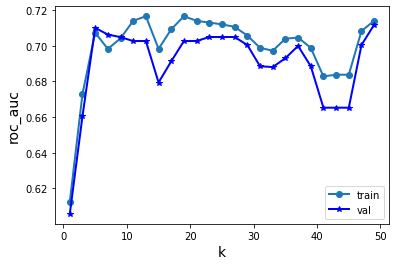

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.712
Valor correspondiente para el hiperparámetro: {'n_neighbors': 49}
0.7804878048780488
[[14  6]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.7804878048780488
tn: 14, fp:6, fn:3, tp:18


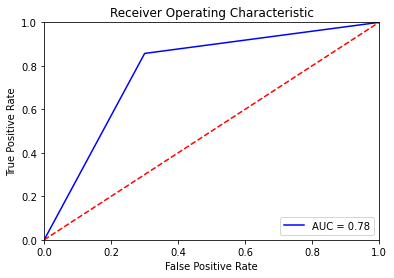

(160, 3) (160,) (41, 3) (41,)


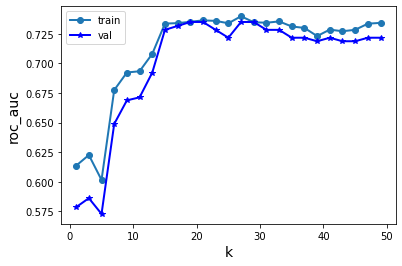

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.735
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.7560975609756098
[[12  8]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.7560975609756098
tn: 12, fp:8, fn:2, tp:19


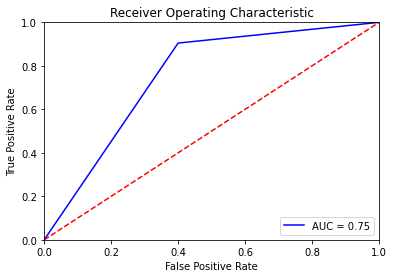

(160, 3) (160,) (41, 3) (41,)


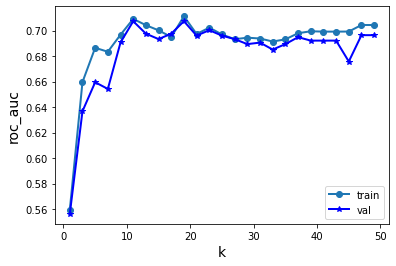

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.707
Valor correspondiente para el hiperparámetro: {'n_neighbors': 11}
0.8048780487804879
[[14  6]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.8048780487804879
tn: 14, fp:6, fn:2, tp:19


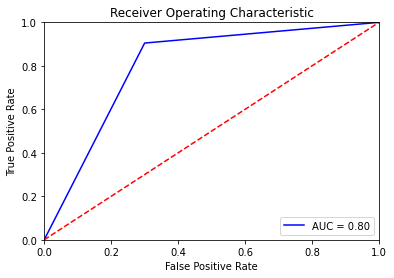

(160, 3) (160,) (41, 3) (41,)


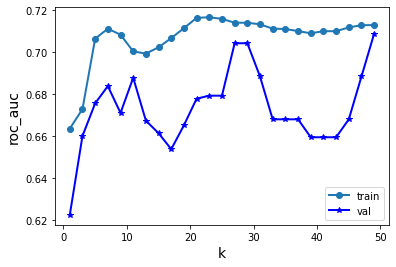

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.709
Valor correspondiente para el hiperparámetro: {'n_neighbors': 49}
0.7560975609756098
[[10 10]
 [ 0 21]]
Sensibilidad y Accuracy 1.0 0.7560975609756098
tn: 10, fp:10, fn:0, tp:21


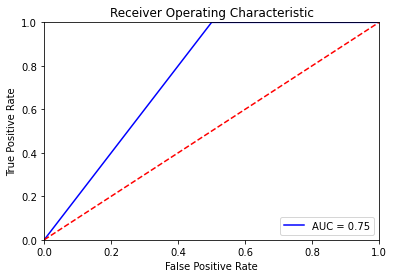

(160, 3) (160,) (41, 3) (41,)


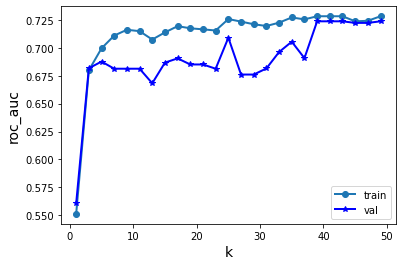

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.724
Valor correspondiente para el hiperparámetro: {'n_neighbors': 39}
0.7073170731707317
[[10 10]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.7073170731707317
tn: 10, fp:10, fn:2, tp:19


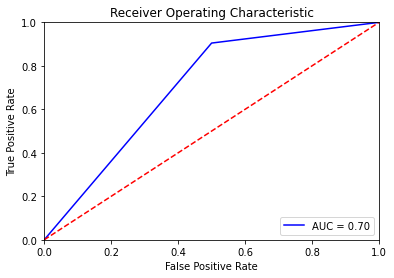

[0.8571428571428571, 0.9047619047619048, 0.9047619047619048, 1.0, 0.9047619047619048] [0.7804878048780488, 0.7560975609756098, 0.8048780487804879, 0.7560975609756098, 0.7073170731707317] [0.7785714285714286, 0.7523809523809524, 0.8023809523809523, 0.75, 0.7023809523809523]


In [85]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])


print(sensi, accuracy, roc)

In [86]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...


model_FS.append("KNN")
mean_FS.append(media_knn)
std_FS.append(desviacion_estandar_knn)
print(media_knn, desviacion_estandar_knn)



media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2_FS.append("KNN")
mean2_FS.append(media_knn2)
std2_FS.append(desviacion_estandar_knn2)
print(media_knn2, desviacion_estandar_knn2)
print(media_knn3, desviacion_estandar_knn3)

media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.7609756097560976 0.036176577985832535
0.7571428571428571 0.03734377890799553
0.819047619047619 0.13636020060263193
0.6 0.09999999999999998


# SVC 

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.706
0.7804878048780488
[[14  6]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.7804878048780488
tn: 14, fp:6, fn:3, tp:18


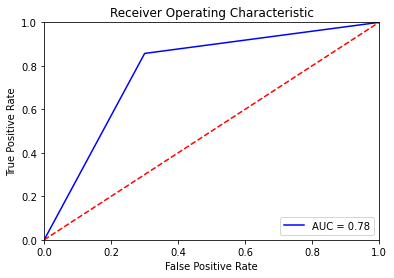

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.738
0.7560975609756098
[[12  8]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.7560975609756098
tn: 12, fp:8, fn:2, tp:19


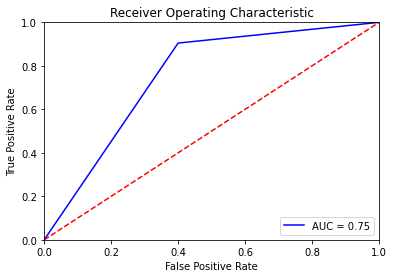

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.706
0.8048780487804879
[[14  6]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.8048780487804879
tn: 14, fp:6, fn:2, tp:19


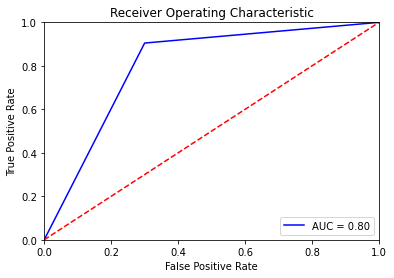

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.713
0.7560975609756098
[[11  9]
 [ 1 20]]
Sensibilidad y Accuracy 0.9523809523809523 0.7560975609756098
tn: 11, fp:9, fn:1, tp:20


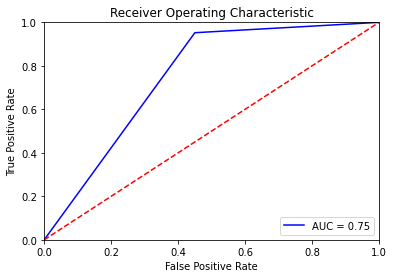

(160, 3) (160,) (41, 3) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.722
0.7073170731707317
[[10 10]
 [ 2 19]]
Sensibilidad y Accuracy 0.9047619047619048 0.7073170731707317
tn: 10, fp:10, fn:2, tp:19


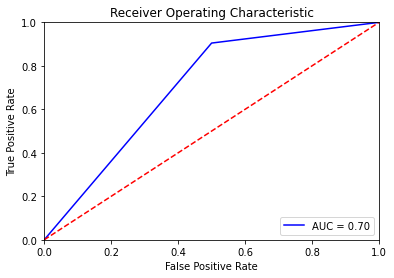

In [87]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = svc(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [88]:
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model_FS.append("SVM")
mean_FS.append(media_svc)
std_FS.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2_FS.append("SVM")
mean2_FS.append(media_svc2)
std2_FS.append(desviacion_estandar_svc2)

media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)

media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.7609756097560976 0.036176577985832535
0.7573809523809524 0.037290609664646104
0.9047619047619048 0.03367175148507369
0.61 0.08944271909999156


# Decision Tree

(160, 3) (160,) (41, 3) (41,)
     ModHypoEpPast6Mon_MOM  LowBGSympCat_ALW  SevHypoEpPastYear_8T
26                       0                 1                     0
1                        0                 0                     0
162                      0                 0                     0
25                       0                 1                     0
94                       0                 0                     0
..                     ...               ...                   ...
53                       1                 1                     0
115                      0                 0                     0
178                      0                 1                     0
99                       1                 0                     0
119                      1                 0                     0

[160 rows x 3 columns]
{'max_depth': 1}


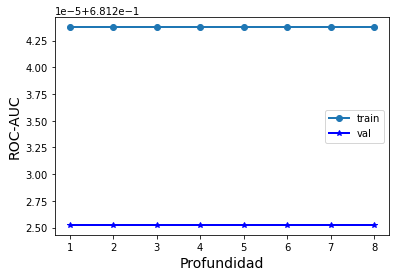

Mejor ROC-AUC en validación cruzada: 0.681
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.7804878048780488
[[14  6]
 [ 3 18]]
tn: 14, fp:6, fn:3, tp:18
Sensibilidad y Accuracy 0.8571428571428571 0.7804878048780488


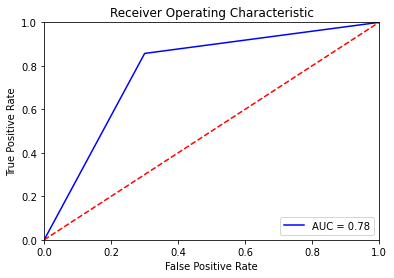

(160, 3) (160,) (41, 3) (41,)
     ModHypoEpPast6Mon_MOM  LowBGSympCat_ALW  SevHypoEpPastYear_8T
150                      1                 0                     0
197                      0                 0                     0
58                       0                 0                     0
161                      1                 0                     0
86                       0                 1                     0
..                     ...               ...                   ...
107                      0                 0                     0
49                       1                 1                     0
114                      0                 0                     0
128                      0                 1                     0
50                       0                 1                     0

[160 rows x 3 columns]
{'max_depth': 1}


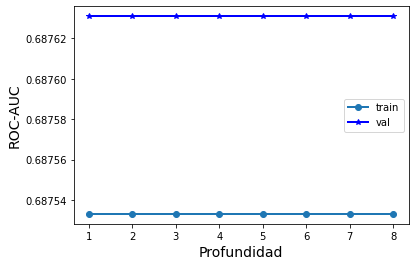

Mejor ROC-AUC en validación cruzada: 0.688
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.7560975609756098
[[12  8]
 [ 2 19]]
tn: 12, fp:8, fn:2, tp:19
Sensibilidad y Accuracy 0.9047619047619048 0.7560975609756098


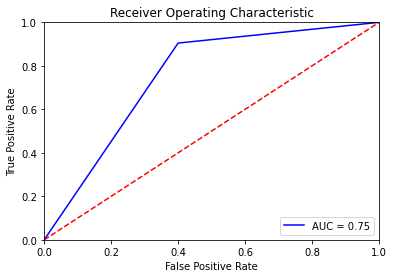

(160, 3) (160,) (41, 3) (41,)
     ModHypoEpPast6Mon_MOM  LowBGSympCat_ALW  SevHypoEpPastYear_8T
131                      0                 0                     0
30                       1                 0                     0
168                      1                 0                     0
154                      1                 0                     0
28                       1                 0                     0
..                     ...               ...                   ...
46                       0                 1                     0
5                        1                 1                     0
58                       0                 0                     0
151                      1                 0                     0
183                      0                 0                     0

[160 rows x 3 columns]
{'max_depth': 1}


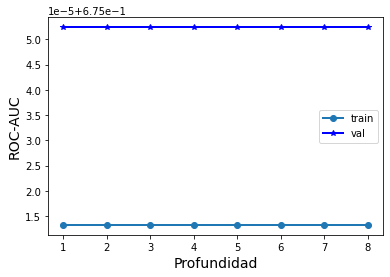

Mejor ROC-AUC en validación cruzada: 0.675
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.8048780487804879
[[14  6]
 [ 2 19]]
tn: 14, fp:6, fn:2, tp:19
Sensibilidad y Accuracy 0.9047619047619048 0.8048780487804879


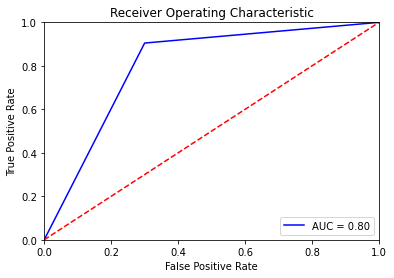

(160, 3) (160,) (41, 3) (41,)
     ModHypoEpPast6Mon_MOM  LowBGSympCat_ALW  SevHypoEpPastYear_8T
77                       0                 0                     0
147                      0                 0                     0
51                       0                 0                     0
157                      0                 1                     0
65                       0                 1                     0
..                     ...               ...                   ...
74                       0                 1                     0
120                      0                 0                     0
191                      0                 1                     0
164                      1                 0                     0
57                       0                 0                     0

[160 rows x 3 columns]
{'max_depth': 1}


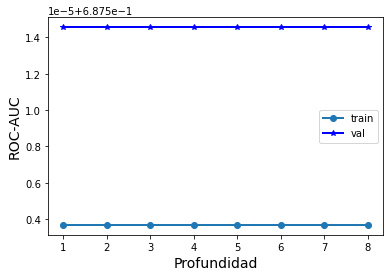

Mejor ROC-AUC en validación cruzada: 0.688
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.7560975609756098
[[11  9]
 [ 1 20]]
tn: 11, fp:9, fn:1, tp:20
Sensibilidad y Accuracy 0.9523809523809523 0.7560975609756098


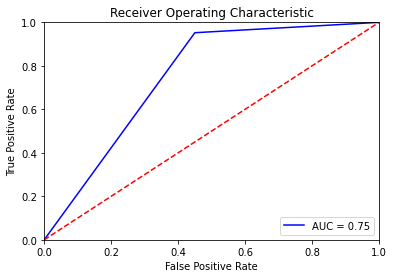

(160, 3) (160,) (41, 3) (41,)
     ModHypoEpPast6Mon_MOM  LowBGSympCat_ALW  SevHypoEpPastYear_8T
54                       0                 0                     0
28                       1                 0                     0
25                       0                 1                     0
21                       0                 1                     0
24                       0                 0                     0
..                     ...               ...                   ...
130                      0                 0                     0
146                      0                 0                     0
29                       0                 0                     0
43                       0                 1                     0
92                       0                 1                     0

[160 rows x 3 columns]
{'max_depth': 1}


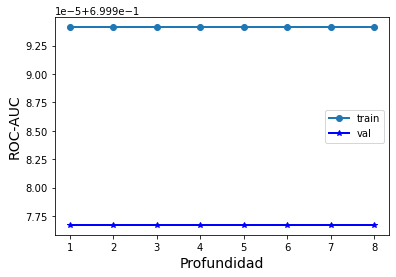

Mejor ROC-AUC en validación cruzada: 0.700
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.7073170731707317
[[10 10]
 [ 2 19]]
tn: 10, fp:10, fn:2, tp:19
Sensibilidad y Accuracy 0.9047619047619048 0.7073170731707317


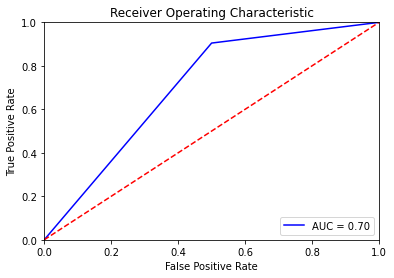

In [89]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = decisionTree(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [90]:
media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...


model2_FS.append("DT")
mean2_FS.append(media_log)
std2_FS.append(desviacion_estandar_log)


print(media_log, desviacion_estandar_log)


media_sen_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit = statistics.stdev(accuracy) # 5.164...


model_FS.append("DT")
mean_FS.append(media_sen_logarit)
std_FS.append(desviacion_estandar_sen_logarit)
print(media_sen_logarit, desviacion_estandar_sen_logarit)

media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)


media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.7573809523809524 0.037290609664646104
0.7609756097560976 0.036176577985832535
0.9047619047619048 0.03367175148507369
0.61 0.08944271909999156


# MLP

# Reg. Logística Lasso

(160, 3) (160,) (41, 3) (41,)
{'C': 1}
0.68125
[[14  6]
 [ 3 18]]
tn: 14, fp:6, fn:3, tp:18
Accuracy: 0.7804878048780488
              precision    recall  f1-score   support

Non-diabetic       0.82      0.70      0.76        20
    Diabetic       0.75      0.86      0.80        21

    accuracy                           0.78        41
   macro avg       0.79      0.78      0.78        41
weighted avg       0.79      0.78      0.78        41

Sensibilidad: 0.8571428571428571


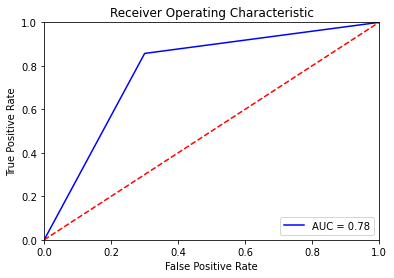

(160, 3) (160,) (41, 3) (41,)
{'C': 1}
0.6875
[[12  8]
 [ 2 19]]
tn: 12, fp:8, fn:2, tp:19
Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

Non-diabetic       0.86      0.60      0.71        20
    Diabetic       0.70      0.90      0.79        21

    accuracy                           0.76        41
   macro avg       0.78      0.75      0.75        41
weighted avg       0.78      0.76      0.75        41

Sensibilidad: 0.9047619047619048


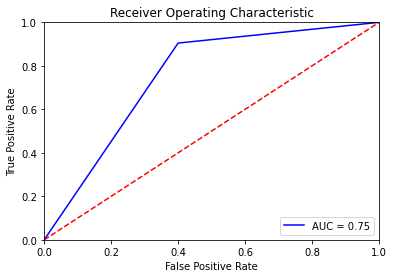

(160, 3) (160,) (41, 3) (41,)
{'C': 1}
0.675
[[14  6]
 [ 2 19]]
tn: 14, fp:6, fn:2, tp:19
Accuracy: 0.8048780487804879
              precision    recall  f1-score   support

Non-diabetic       0.88      0.70      0.78        20
    Diabetic       0.76      0.90      0.83        21

    accuracy                           0.80        41
   macro avg       0.82      0.80      0.80        41
weighted avg       0.82      0.80      0.80        41

Sensibilidad: 0.9047619047619048


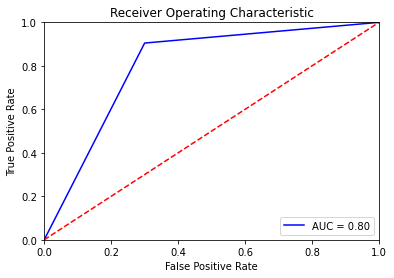

(160, 3) (160,) (41, 3) (41,)
{'C': 1}
0.6875
[[11  9]
 [ 1 20]]
tn: 11, fp:9, fn:1, tp:20
Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

Non-diabetic       0.92      0.55      0.69        20
    Diabetic       0.69      0.95      0.80        21

    accuracy                           0.76        41
   macro avg       0.80      0.75      0.74        41
weighted avg       0.80      0.76      0.75        41

Sensibilidad: 0.9523809523809523


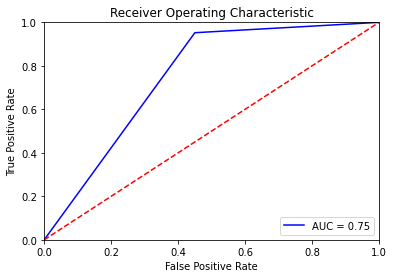

(160, 3) (160,) (41, 3) (41,)
{'C': 1}
0.7
[[10 10]
 [ 2 19]]
tn: 10, fp:10, fn:2, tp:19
Accuracy: 0.7073170731707317
              precision    recall  f1-score   support

Non-diabetic       0.83      0.50      0.62        20
    Diabetic       0.66      0.90      0.76        21

    accuracy                           0.71        41
   macro avg       0.74      0.70      0.69        41
weighted avg       0.74      0.71      0.69        41

Sensibilidad: 0.9047619047619048


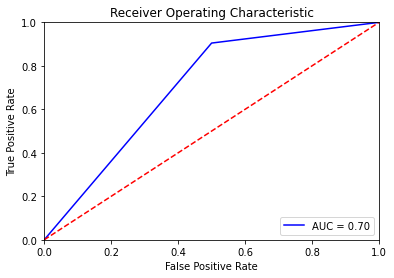

In [91]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = reg_Lasso(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[3])

In [92]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model_FS.append("LASSO")
mean_FS.append(media_lasso)
std_FS.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2_FS.append("LASSO")
mean2_FS.append(media_lasso2)
std2_FS.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)


media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.7609756097560976 0.036176577985832535
0.7573809523809524 0.037290609664646104
0.9047619047619048 0.03367175148507369
0.61 0.08944271909999156


In [93]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model_FS
df_metrics["mean"] = mean_FS
df_metrics["std"] = std_FS

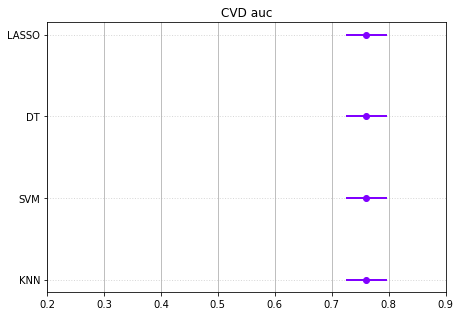

In [94]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='CVD auc', flag_save_figure=True)


In [95]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2_FS
df_metrics2["mean"] = mean2_FS
df_metrics2["std"] = std2_FS

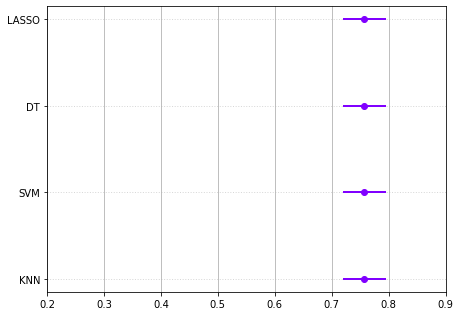

In [96]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)